# Proyecto: Árboles de Decisión
### Scikit Learn

En este proyecto vamos a aprender cómo trabajar con árboles de decisión utilizando la librería de scikit-learn. Durante el proyecto se hará uso de diferentes paquetes de Python que importan a continuación:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as ma
import matplotlib.font_manager as fm

El siguiente cóidgo servirá para embeber los gráficos en el propio notebook en lugar de abrirlos en nueva ventana.

In [2]:
%matplotlib inline

## Datasets sintéticos

Vamos a comenzar analizando el rendimiento de los árboles de decisión sobre conjuntos de datos sintéticos.

En el modulo datasets de scikit-learn, encontramos diferentes funciones para generar conjuntos de datos sintéticos. Para poder representar los datos y las decisiones de los árboles, nos limitaremos a datos en 2D. Utilizaremos:

Scikit learn provee una serie de funciones para generar conjuntos de datos sintéticos con dos dimensiones (variables).
* **Blobs** (función <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">sklearn.datasets.make_blobs</a>): Dos bolas gausianas
* **Esferas concéntricas** (función <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles">sklearn.datasets.make_gaussian_quantiles</a>).

Veamos qué aspecto tienen los datasets al representarlos

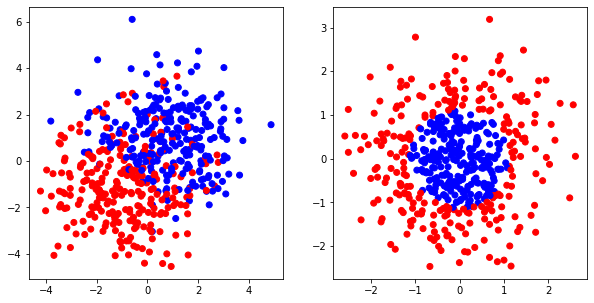

In [15]:
from sklearn import datasets

X_blob, y_blob =  datasets.make_blobs(n_samples=500,
                                      n_features=2,
                                      centers= [(1,1), (-1,-1)],
                                      random_state = 13,
                                      cluster_std = 1.5)

X_gq, y_gq = datasets.make_gaussian_quantiles(n_samples=500,
                                              n_classes=2,
                                              random_state=23)

cm = ma.ListedColormap(['#0000FF', '#FF0000'])    # blue, red
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=cm)
plt.subplot(1,2,2)
plt.scatter(X_gq[:, 0], X_gq[:, 1], c=y_gq, cmap=cm)

plt.show()

Vamos a entrenar un árbol de decisión con los parámetros por defecto, y luego trabajaremos sobre ellos. 

### PARÁMETROS POR DEFECTO
Primero entrenamos un árbol de decisión con los parámetros por defecto para cada uno de los conjuntos de datos generados en la celda de código anterior.

### - Árbol 1

In [16]:
print(X_blob[0:5])
print(y_blob[0:5])

[[-1.81606894 -2.16620181]
 [ 1.21563367  2.3577573 ]
 [-0.30052327  1.55673889]
 [-0.64492563 -1.35791307]
 [-2.0741386  -2.42597048]]
[1 0 0 1 1]


In [17]:
from sklearn.tree import DecisionTreeClassifier

sktree_01 = DecisionTreeClassifier()
sktree_01.fit(X_blob, y_blob)

DecisionTreeClassifier()

In [18]:
from sklearn.tree import export_text
print(export_text(sktree_01))

|--- feature_1 <= -0.49
|   |--- feature_0 <= 1.78
|   |   |--- feature_0 <= 0.18
|   |   |   |--- feature_0 <= -0.19
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.19
|   |   |   |   |--- feature_1 <= -0.92
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -0.92
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.18
|   |   |   |--- feature_1 <= -1.38
|   |   |   |   |--- feature_0 <= 0.23
|   |   |   |   |   |--- feature_1 <= -3.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -3.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.23
|   |   |   |   |   |--- feature_0 <= 1.64
|   |   |   |   |   |   |--- feature_0 <= 0.78
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.78
|   |   |   |   |   |   |   |--- feature_0 <= 0.81
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.81
|   |   |   |   |   |   |   |   

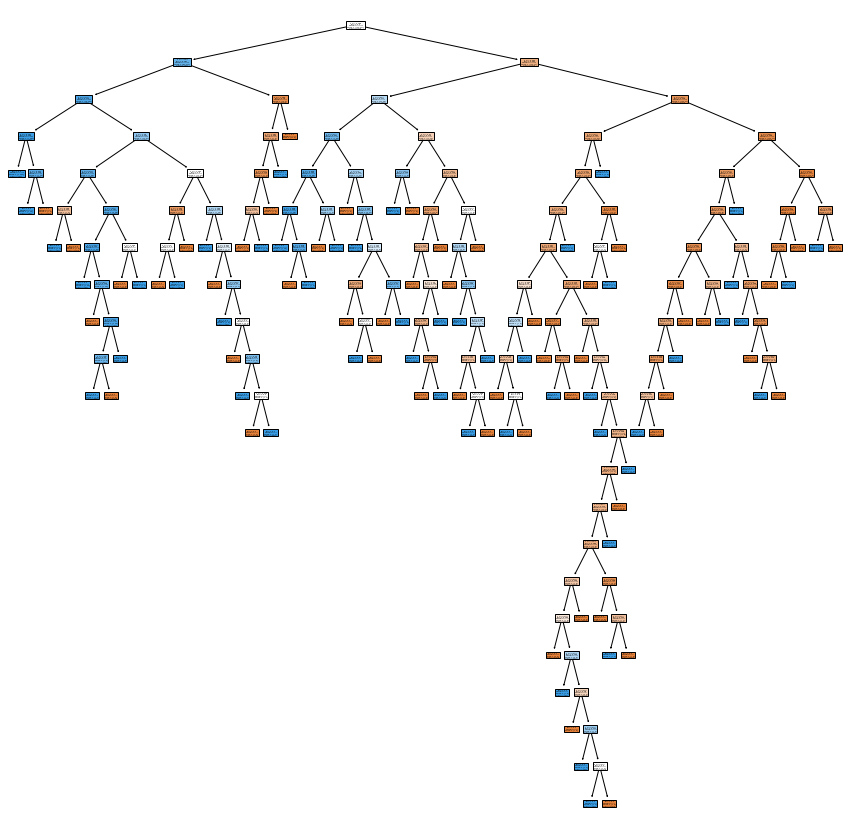

In [19]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree_01, filled = True, proportion = False, feature_names = ['x', 'y'], class_names=['ROJO','AZUL'])

### - Árbol 2

In [20]:
print(X_gq[0:5])
print(y_gq[0:5])

[[-1.35336552 -0.827515  ]
 [-0.54790551  0.00138299]
 [-0.84903971 -0.24810166]
 [-0.51475785 -0.51866289]
 [-0.40915001  0.22016579]]
[1 0 0 0 0]


In [21]:
from sklearn.tree import DecisionTreeClassifier

sktree_02 = DecisionTreeClassifier()
sktree_02.fit(X_gq, y_gq)

DecisionTreeClassifier()

In [22]:
from sklearn.tree import export_text
print(export_text(sktree_02))

|--- feature_0 <= -1.08
|   |--- feature_0 <= -1.12
|   |   |--- class: 1
|   |--- feature_0 >  -1.12
|   |   |--- feature_0 <= -1.11
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.11
|   |   |   |--- class: 1
|--- feature_0 >  -1.08
|   |--- feature_1 <= -1.01
|   |   |--- feature_1 <= -1.12
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -1.12
|   |   |   |--- feature_0 <= 0.30
|   |   |   |   |--- feature_0 <= -0.22
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.22
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.30
|   |   |   |   |--- class: 1
|   |--- feature_1 >  -1.01
|   |   |--- feature_1 <= 1.09
|   |   |   |--- feature_0 <= 0.99
|   |   |   |   |--- feature_1 <= -0.78
|   |   |   |   |   |--- feature_0 <= 0.72
|   |   |   |   |   |   |--- feature_0 <= -0.51
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.51
|   |   |   |   |   |   |   |--- feature_0 <= 0.61
|   |   |   |   |   |   | 

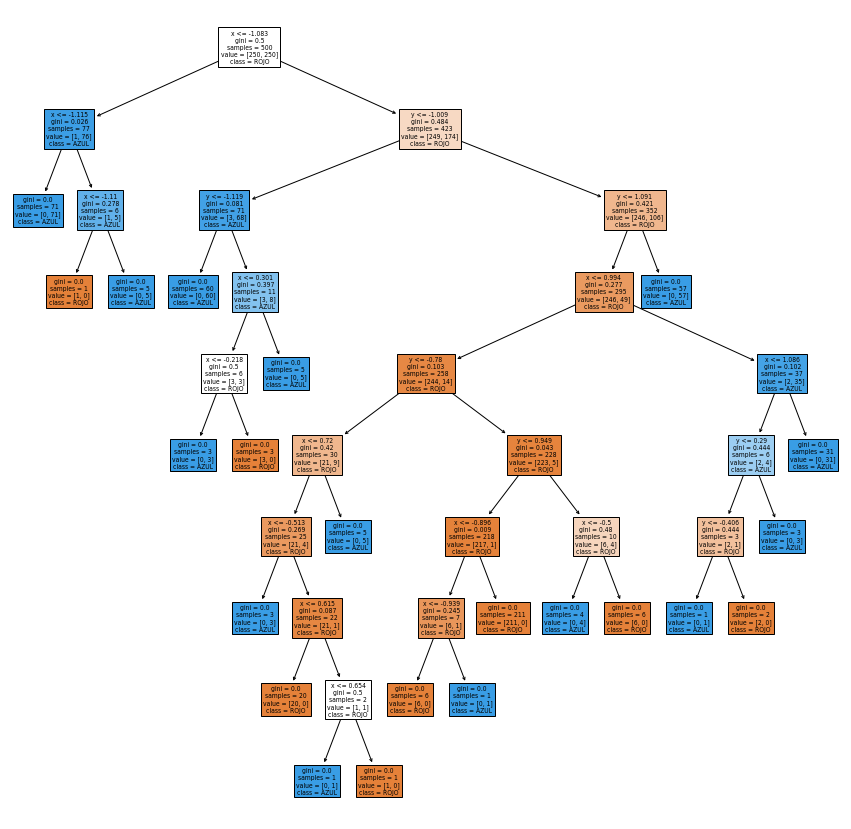

In [23]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree_02, filled = True, proportion = False, feature_names = ['x', 'y'], class_names=['ROJO','AZUL'])

Dado que no hemos dividido los datos y se los hemos dado completos al modelo, sin poner tampoco ninguna restricción al mismo, éste ha podido "aprenderse" los datos al detalle y lo que esperamos es que tenga un acierto del 100% (como comprobamos a continuación).

In [24]:
score_01 = sktree_01.score(X_blob, y_blob, sample_weight=None)
print(score_01)

1.0


In [25]:
score_02 = sktree_02.score(X_gq, y_gq, sample_weight=None)
print(score_02)

1.0


### REGIONES Y FRONTERAS

Utilizamos la función plot_decision_regions de mlextend con los árboles entrenadoS en el paso anterior para representar con sombreados las regiones de decisión del clasificador.


### - Árbol 1

<AxesSubplot:>

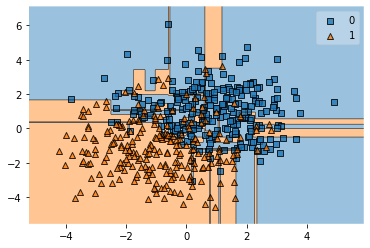

In [26]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_blob, y_blob, clf=sktree_01)

### - Árbol 2

<AxesSubplot:>

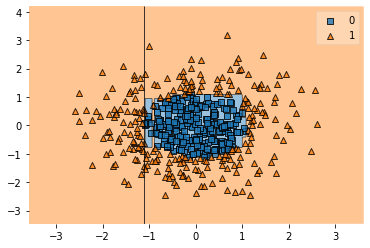

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_gq, y_gq, clf=sktree_02)

Los árboles de decisión siempre dividen el espacio en formas rectangulares (2D: rectángulos, 3D: cubos...) y eso es lo que vemos en las represantaciones gráficas definidas en las celdas superiores.

Además en estos casos, al no haber restringido al modelo de cara a la clasificación de los elementos, se han obtenido fronteras bastantes complejas y divisiones raras del espacio al tratar el modelo de clasificar todos y cada uno de los puntos. Se puede ver claramente en el gráfico del Árbol 1 y, aunque en mucha menor medida en el Árbol 2 (debido a que los puntos en este 2º caso están más concentrados en una misma zona y al modelo le ha sido más sencillo).


### NUEVOS SETS DE DATOS

Generamos un nuevo conjunto de datos utilizando las mismas funciones generadoras para cada uno de los datasets con 100 puntos cada uno y los mismos parámetros, cambiando únicamente el random state por otro a tu elección. 

Utilizaremos estos nuevos conjuntos como conjunto de TEST, evaluando el acierto en clasificación en cada caso.

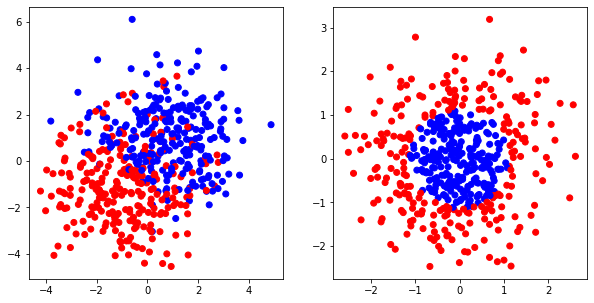

In [28]:
from sklearn import datasets

X_blob2, y_blob2 =  datasets.make_blobs(n_samples=100,
                                      n_features=2,
                                      centers= [(1,1), (-1,-1)],
                                      random_state = 135,
                                      cluster_std = 1.5)

X_gq2, y_gq2 = datasets.make_gaussian_quantiles(n_samples=100,
                                              n_classes=2,
                                              random_state=234)

cm = ma.ListedColormap(['#0000FF', '#FF0000'])    # blue, red
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=cm)
plt.subplot(1,2,2)
plt.scatter(X_gq[:, 0], X_gq[:, 1], c=y_gq, cmap=cm)

plt.show()

In [29]:
score_01 = sktree_01.score(X_blob2, y_blob2, sample_weight=None)
print(score_01)

0.82


In [30]:
score_02 = sktree_02.score(X_gq2, y_gq2, sample_weight=None)
print(score_02)

0.93


Como era de esperar la precisión del modelo con los nuevos datos es menor que la obtenida con los datos de entrenamiento ya que estos son datos nuevos que no ha visto nunca y los otros se los ha podido aprender al detalle.

Por otro lado, podemos observar también diferencias entre las tasas de acierto de ambos modelos. Esto se debe a la distribución de los puntos en cada caso: en el caso nº 2 la frontera entre ambas clases está más definida que en el caso nº 1, por lo que ante nuevos datos que guarden las distribucciones propias de sus casos, el 2º modelo obtiene tasas de acierto mejores.

### AJUSTE DE HIPERPARÁMETROS: max_depth

Ajustamos el parámetro de la profundidad máxima del árbol manualmente y volvemos a entrenar el modelo utilizando los datos originales para obtener un rendimiento mejor en uno de los ejemplos anteriores sobre datos de test.

### - Árbol 1

In [31]:
# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
sktree_01.get_depth()

21

In [32]:
from sklearn.tree import DecisionTreeClassifier

sktree_01 = DecisionTreeClassifier(max_depth=5)
sktree_01.fit(X_blob, y_blob)

DecisionTreeClassifier(max_depth=5)

In [33]:
score_01 = sktree_01.score(X_blob2, y_blob2, sample_weight=None)
print(score_01)

0.84


Hemos probado distintas profundidades (4,5,6,9,10,13,14,15...) y la profundidad definida es la menor que obtiene unas tasas de acierto mejores que las iniciales. Hay profundidades mayores que también las alcanzan pero dado que las tasas de acierto son similares, se opta por reducir la profundidad del árbol y simplificarlo dentro de las posibilidades.

Para reducir la profundidad del árbol podríamos utilizar también los parámetros "min_samples_split" y "min_samples_leaf" que ponen restricciones sobre el mínimo nº de elementos por nodo para realizar una división y el nº mínimo de elementos que debe tener cualquier hoja del árbol respectivamente.

### - Árbol 2

In [34]:
# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
sktree_02.get_depth()

9

In [37]:
from sklearn.tree import DecisionTreeClassifier

sktree_02 = DecisionTreeClassifier(max_depth=8)
sktree_02.fit(X_gq, y_gq)

DecisionTreeClassifier(max_depth=8)

In [38]:
score_02 = sktree_02.score(X_gq2, y_gq2, sample_weight=None)
print(score_02)

0.94


Debido a la distribución de las clases que comentamos con anterioridad y que la frontera entre ambas está bastante bien definida, el hecho de reducir la profundidad lo único que consigue es que dicha frontera pierda definición y por tanto se reduzca la tasa de acierto. De las probadas (3,4,5,6,7,8), la profundidad 8 es la única que permite reducir la profundidad sin perder tasa de acierto.

Para reducir la profundidad del árbol podríamos utilizar también los parámetros "min_samples_split" y "min_samples_leaf" que ponen restricciones sobre el mínimo nº de elementos por nodo para realizar una división y el nº mínimo de elementos que debe tener cualquier hoja del árbol respectivamente.

### AJUSTE DE HIPERPARÁMETROS: min_samples_split & min_samples_leaf

Dejando el parámetro de max_depth a None (sin límite) utilizamos los parametros de min_samples_split y min_samples_leaf para conseguir un acierto similar en uno de los árboles anteriores.

### - Árbol 1

In [39]:
from sklearn.tree import DecisionTreeClassifier

sktree_01 = DecisionTreeClassifier(min_samples_split=60, min_samples_leaf=20)
sktree_01.fit(X_blob, y_blob)

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=60)

In [40]:
score_01 = sktree_01.score(X_blob2, y_blob2, sample_weight=None)
print(score_01)

0.87


In [41]:
# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
sktree_01.get_depth()

5

Para reducir la profundidad del árbol podríamos utilizar también los parámetros "min_samples_split" y "min_samples_leaf" que ponen restricciones sobre las divisiones y las hojas del árbol. Funcionamiento de los parámetros:

    -min_samples_split: define el nº mínimo de elementos que tiene que tener un nodo para poder dividirlo.

    -min_samples_leaf: define el nº mínimo de elementos que debe tener cualquier hoja del árbol.

Dentro de los parámetros de definición de un árbol, otros principales que nos puede servir para controlar la profundidad y complejidad del árbol son: 

    - "ccp_alpha": Este parámetro controla la complejidad y el error del árbol asignando un coste a cada nodo/división del  mismo, analizando si la mejora obtenida por la división del nodo compensa la complejidad que está añadiendo esa división (nuevos nodos) al árbol.
    
    - "class_weight": nos permite definir diferentes pesos a cada variable y que influirán en los valores de reducción de la impureza de cada variable en el split y por tanto en su importancia a la hora de que el  árbol elija una variable para    realizar una división.
    
    - "min_impurity_decrease": define la reducción mínima de impureza que tiene que conseguir una división para que ésta    pueda realizarse.

### ESQUEMA DE UN ÁRBOL DE DECISIÓN

Utilizamos la función plot_tree para representar UNO de los árboles entrenados en los dos pasos anteriores. 

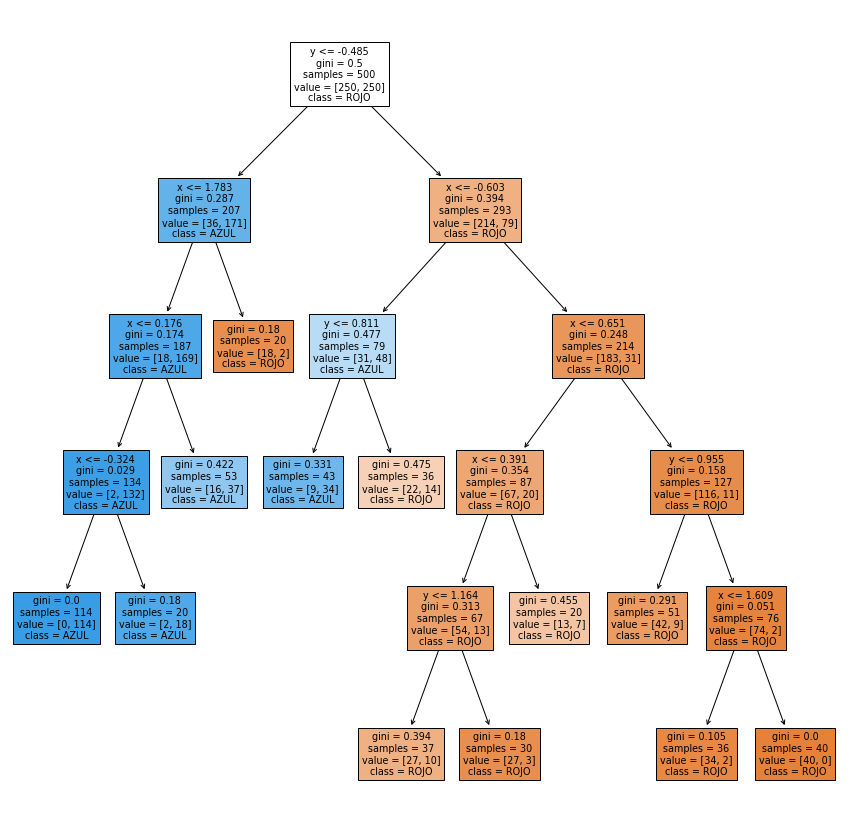

In [42]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree_01, filled = True, proportion = False, feature_names = ['x', 'y'], class_names=['ROJO','AZUL'])

### - Definición de los elementos del gráfico:

En este caso tenemos elementos de dos clases por lo que es un Problema de Clasificación. Definimos los elementos del gráfico en orden descendente según aparecen en cada nodo del árbol:
        
    - "Variable y Umbral de la división": aparece en todos los nodos salvo en las hojas finales del árbol (ya que en ellas no hay divisiones). Define la variable y el umbral por los que se ha realizado la división en dicho nodo.

    - "Valor de la función de impureza": define el valor de la impureza en el nodo de acuerdo a la función de impureza que hemos definido para nuestro árbol (en este caso se ha dejado por defecto y entonces la función ha tomado el índice GINI).
    
    - "Samples": nº de elementos totales en el nodo.
    
    - "Value": En este caso al ser un problema de clasificación define el nº de elementos de cada clase en el nodo.
    
    - "Class": Clase 

Además, al añadir el parámetro "filled=True" a la función, al representar el árbol se define un color para cada clase de los datos y se rellena cada nodo con el color de los elementos predominantes en el nodo (cuanto más puro el nodo, más intenso será el color del relleno).

En cuanto a la interpretación general del árbol, como se puede observar la clase "AZUL" se consigue dividir/clasificar más fácilmente (necesitando menor nº de divisiones para reducir las impurezas de los nodos) mientras que la clase "ROJO" necesita un mayor nº de divisiones para conseguir valores similares creando un árbol ligeramente desbalanceado. También debido a las restricciones impuestas se puede observar que hay algunas hojas (nodos finales) con las impurezas mayores.


#### Feature importance

Basándonos en la figura anterior, las variables con mayor influencia son aquellas que permitan predecir/clasificar mejor los elementos del árbol, es decir, aquellas que permitan una mayor reducción de la impureza en los distintos nodos del árbol. La importancia de una variable se suele medir como la suma de la variación de la impurezas en cada división en la que se toma un valor umbral de dicha variable.

En este caso y si visualizamos la distribución de los puntos en el 1er gráfico podría considerarse que la variable "y" permite una mejor predicción/clasificación de los puntos.

Revisamos la importancia de las variables proporcionada por los módulos de "Scikit Learn":

In [43]:
sktree_01.feature_importances_

array([0.40753775, 0.59246225])

## Clasificación: Pingüinos

En este primer ejemplo vamos a utilizar un árbol de decisión sobre el conjunto de datos Palmer penguins. 

Son mediciones de tres especies de pingüinos tomadas en la estación Palmer en la Antártida. Es un dataset sencillo que se suele utilizar con fines educativos demostrativos.

Nuestro objetivo será determinar la especie de pingüino en función de las diferentes mediciones sobre el tamaño del pico, las alteas, etc. Se trata de un problema de clasificación multiclase, donde tenemos tres posibles especies: Adelie, Chinstrap, Gentoo.

Puedes encontrar más información sobre el dataset en:

- [El paquete palmerpenguins (R)](https://github.com/allisonhorst/palmerpenguins) 
- [Kaggle](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv)
- [El artículo original del estudio](https://doi.org/10.1371/journal.pone.0090081)


Las variables disponibles son:

* **island** 	Isla en la que se realiza la observación
* **culmen_length_mm** 	Longitud del pico
* **culmen_depth_mm** 	Anchura del pico
* **flipper_length_mm** 	Longitud de la aleta
* **body_mass_g** 	Peso en gramos
* **sex** 	Género (MALE/FEMALE)


* **species** Variable objetivo

El siguiente código carga el conjunto de datos como un dataframe de Pandas

Al final del código se muestra el nombre de las variables independentes (predictores).

In [3]:
data = pd.read_csv("../data_in/penguins_size.csv",sep=",").reset_index(drop=True)

print(data.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


Echamos un vistazo a las características del dataset usando el paquete <a href="https://github.com/pandas-profiling/pandas-profiling">Pandas Profiling</a>

In [4]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data, title='Palmer Penguins', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../data_out/penguins.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### VARIABLES DEL DATASET

VARIABLE OBJETIVO:

* **species** 	Categórica

VARIABLES PREDICTORAS:

* **island** 	Categórica
* **culmen_length_mm** 	Continua
* **culmen_depth_mm** 	Continua
* **flipper_length_mm** 	Continua
* **body_mass_g** 	Continua
* **sex** 	Categórica

### PROCESAMIENTO DEL DATASET

In [5]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
col_nulls = data.isnull().sum()
col_perc = (col_nulls/data.shape[0])*100

nulls_data = pd.concat((col_nulls, col_perc), axis=1, keys=["N_nulls", "Perc_nulls"])
nulls_data[nulls_data["N_nulls"]!=0]

,N_nulls,Perc_nulls
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,10,2.906977


In [8]:
# Revisamos las observaciones con Na's:
na_rows = data[data.isna().any(axis=1)]
na_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
na_rows.shape

(10, 7)

In [10]:
# Dado que el nº de observaciones del dataset inicial es de 344 se decide eliminar las filas con Na's:
data2 = data.dropna(axis=0, how="any").copy()

In [11]:
print(data2['island'].unique())
print(data2['sex'].unique())

data2[data2['sex']=="."]

['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Existe una observación con un valor erróneo dentro de la variable "sex". También se va a eliminar.

In [12]:
data3 = data2[data2['sex']!='.'].copy()

In [13]:
col_nulls = data3.isnull().sum()
col_perc = (col_nulls/data3.shape[0])*100

nulls_data = pd.concat((col_nulls, col_perc), axis=1, keys=["N_nulls", "Perc_nulls"])
nulls_data[nulls_data["N_nulls"]!=0]

,N_nulls,Perc_nulls


### SUBCONJUNTOS DE DATOS (TRAIN & TEST)

Realizamos una partición aleatoria de training y test de los datos. Usaremos una partición ESTRATIFICADA en la que el 80% de los datos se usarán para entrenamientoy el 20% de datos restantes para test.
Una vez hecha la división, separamos los predictores del target (X_train, X_test, y_train, y_test).


In [14]:
X = data3.loc[:,data3.columns!='species']
y = data3.loc[:,'species']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=113) 

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 6)
(266,)
(67, 6)
(67,)


El prior de la variable objetivo y del dataset es la clase/valor de la variable objetivo que predomina o tiene mayor probabilidad de producirse. En este caso al ser la variable target de tipo categórico, se define 3 clases y la que tiene mayor número de elementos y constituye el "prior" del dataset es la especie "Adelie".

In [21]:
df_y = pd.DataFrame(y)

species
Adelie       146
Chinstrap     68
Gentoo       119
Name: species, dtype: int64

Para comprobar si la división de los datos de entrenamiento y test se ha hecho correctamente y de forma estratificada vamos a revisar las distribuciones de los datos, tanto de "train" como de "test" (variable target y variables predictoras).

array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

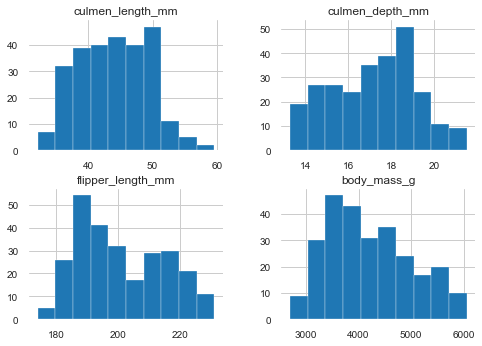

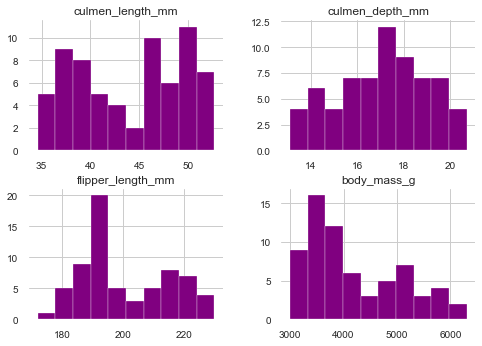

In [23]:
X_train.hist()
X_test.hist(color='purple')

(array([24.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0., 14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

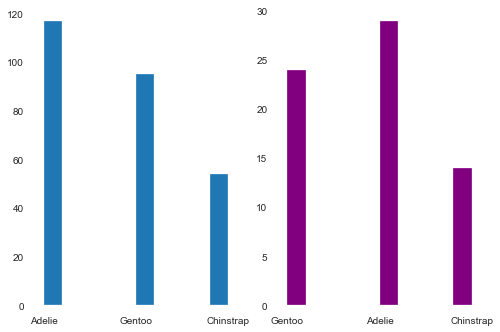

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train)
ax2.hist(y_test,color='purple')

Las distribuciones de todos los subconjuntos de entrenamiento y test tienen distribuciones similares entre sí, por lo que se considera correcta la división de los datos.

### CODIFICACIÓN DE VARIABLES CATEGÓRICAS

VARIABLES PREDICTORAS (vars. categóricas):

* **island** 	Categórica
* **sex** 	Categórica

In [25]:
print(data3['island'].unique())
print(data3['sex'].unique())

['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


Dado que las 2 variables predictoras de tipo categórico que tiene el dataset no son ordinales y tienen pocas categorías, se puede considerar "One-Hot" como el encoder idóneo para este caso.

In [26]:
# 1ª OPCIÓN: 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_features = ['island', 'sex']
preprocess = ColumnTransformer([('one_hot', OneHotEncoder(sparse=False, drop='if_binary'), one_hot_features)],
                               remainder='passthrough')

X_train_enc = preprocess.fit_transform(X_train)
X_test_enc = preprocess.transform(X_test)

In [27]:
# 2ª OPCIÓN:
from category_encoders import OneHotEncoder as OneHotEncoderCE

encoder = OneHotEncoderCE(drop_invariant=True, use_cat_names=True, cols = ['island', 'sex'])
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [28]:
print(X_train_enc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 115 to 117
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island_Biscoe      266 non-null    int64  
 1   island_Torgersen   266 non-null    int64  
 2   island_Dream       266 non-null    int64  
 3   culmen_length_mm   266 non-null    float64
 4   culmen_depth_mm    266 non-null    float64
 5   flipper_length_mm  266 non-null    float64
 6   body_mass_g        266 non-null    float64
 7   sex_MALE           266 non-null    int64  
 8   sex_FEMALE         266 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 20.8 KB
None


In [29]:
print(X_test_enc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 251 to 128
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island_Biscoe      67 non-null     int64  
 1   island_Torgersen   67 non-null     int64  
 2   island_Dream       67 non-null     int64  
 3   culmen_length_mm   67 non-null     float64
 4   culmen_depth_mm    67 non-null     float64
 5   flipper_length_mm  67 non-null     float64
 6   body_mass_g        67 non-null     float64
 7   sex_MALE           67 non-null     int64  
 8   sex_FEMALE         67 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 5.2 KB
None


### ÁRBOL 1 (HIPERPARÁMETROS POR DEFECTO)

In [40]:
from sklearn.tree import DecisionTreeClassifier

sktree_03 = DecisionTreeClassifier()
sktree_03.fit(X_train_enc, y_train)

DecisionTreeClassifier()

In [41]:
# Profundidad del árbol:
sktree_03.get_depth()

5

In [42]:
y_train[:].value_counts()

Adelie       117
Gentoo        95
Chinstrap     54
Name: species, dtype: int64

In [43]:
X_train_enc.columns

Index(['island_Biscoe', 'island_Torgersen', 'island_Dream', 'culmen_length_mm',
       'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_MALE',
       'sex_FEMALE'],
      dtype='object')

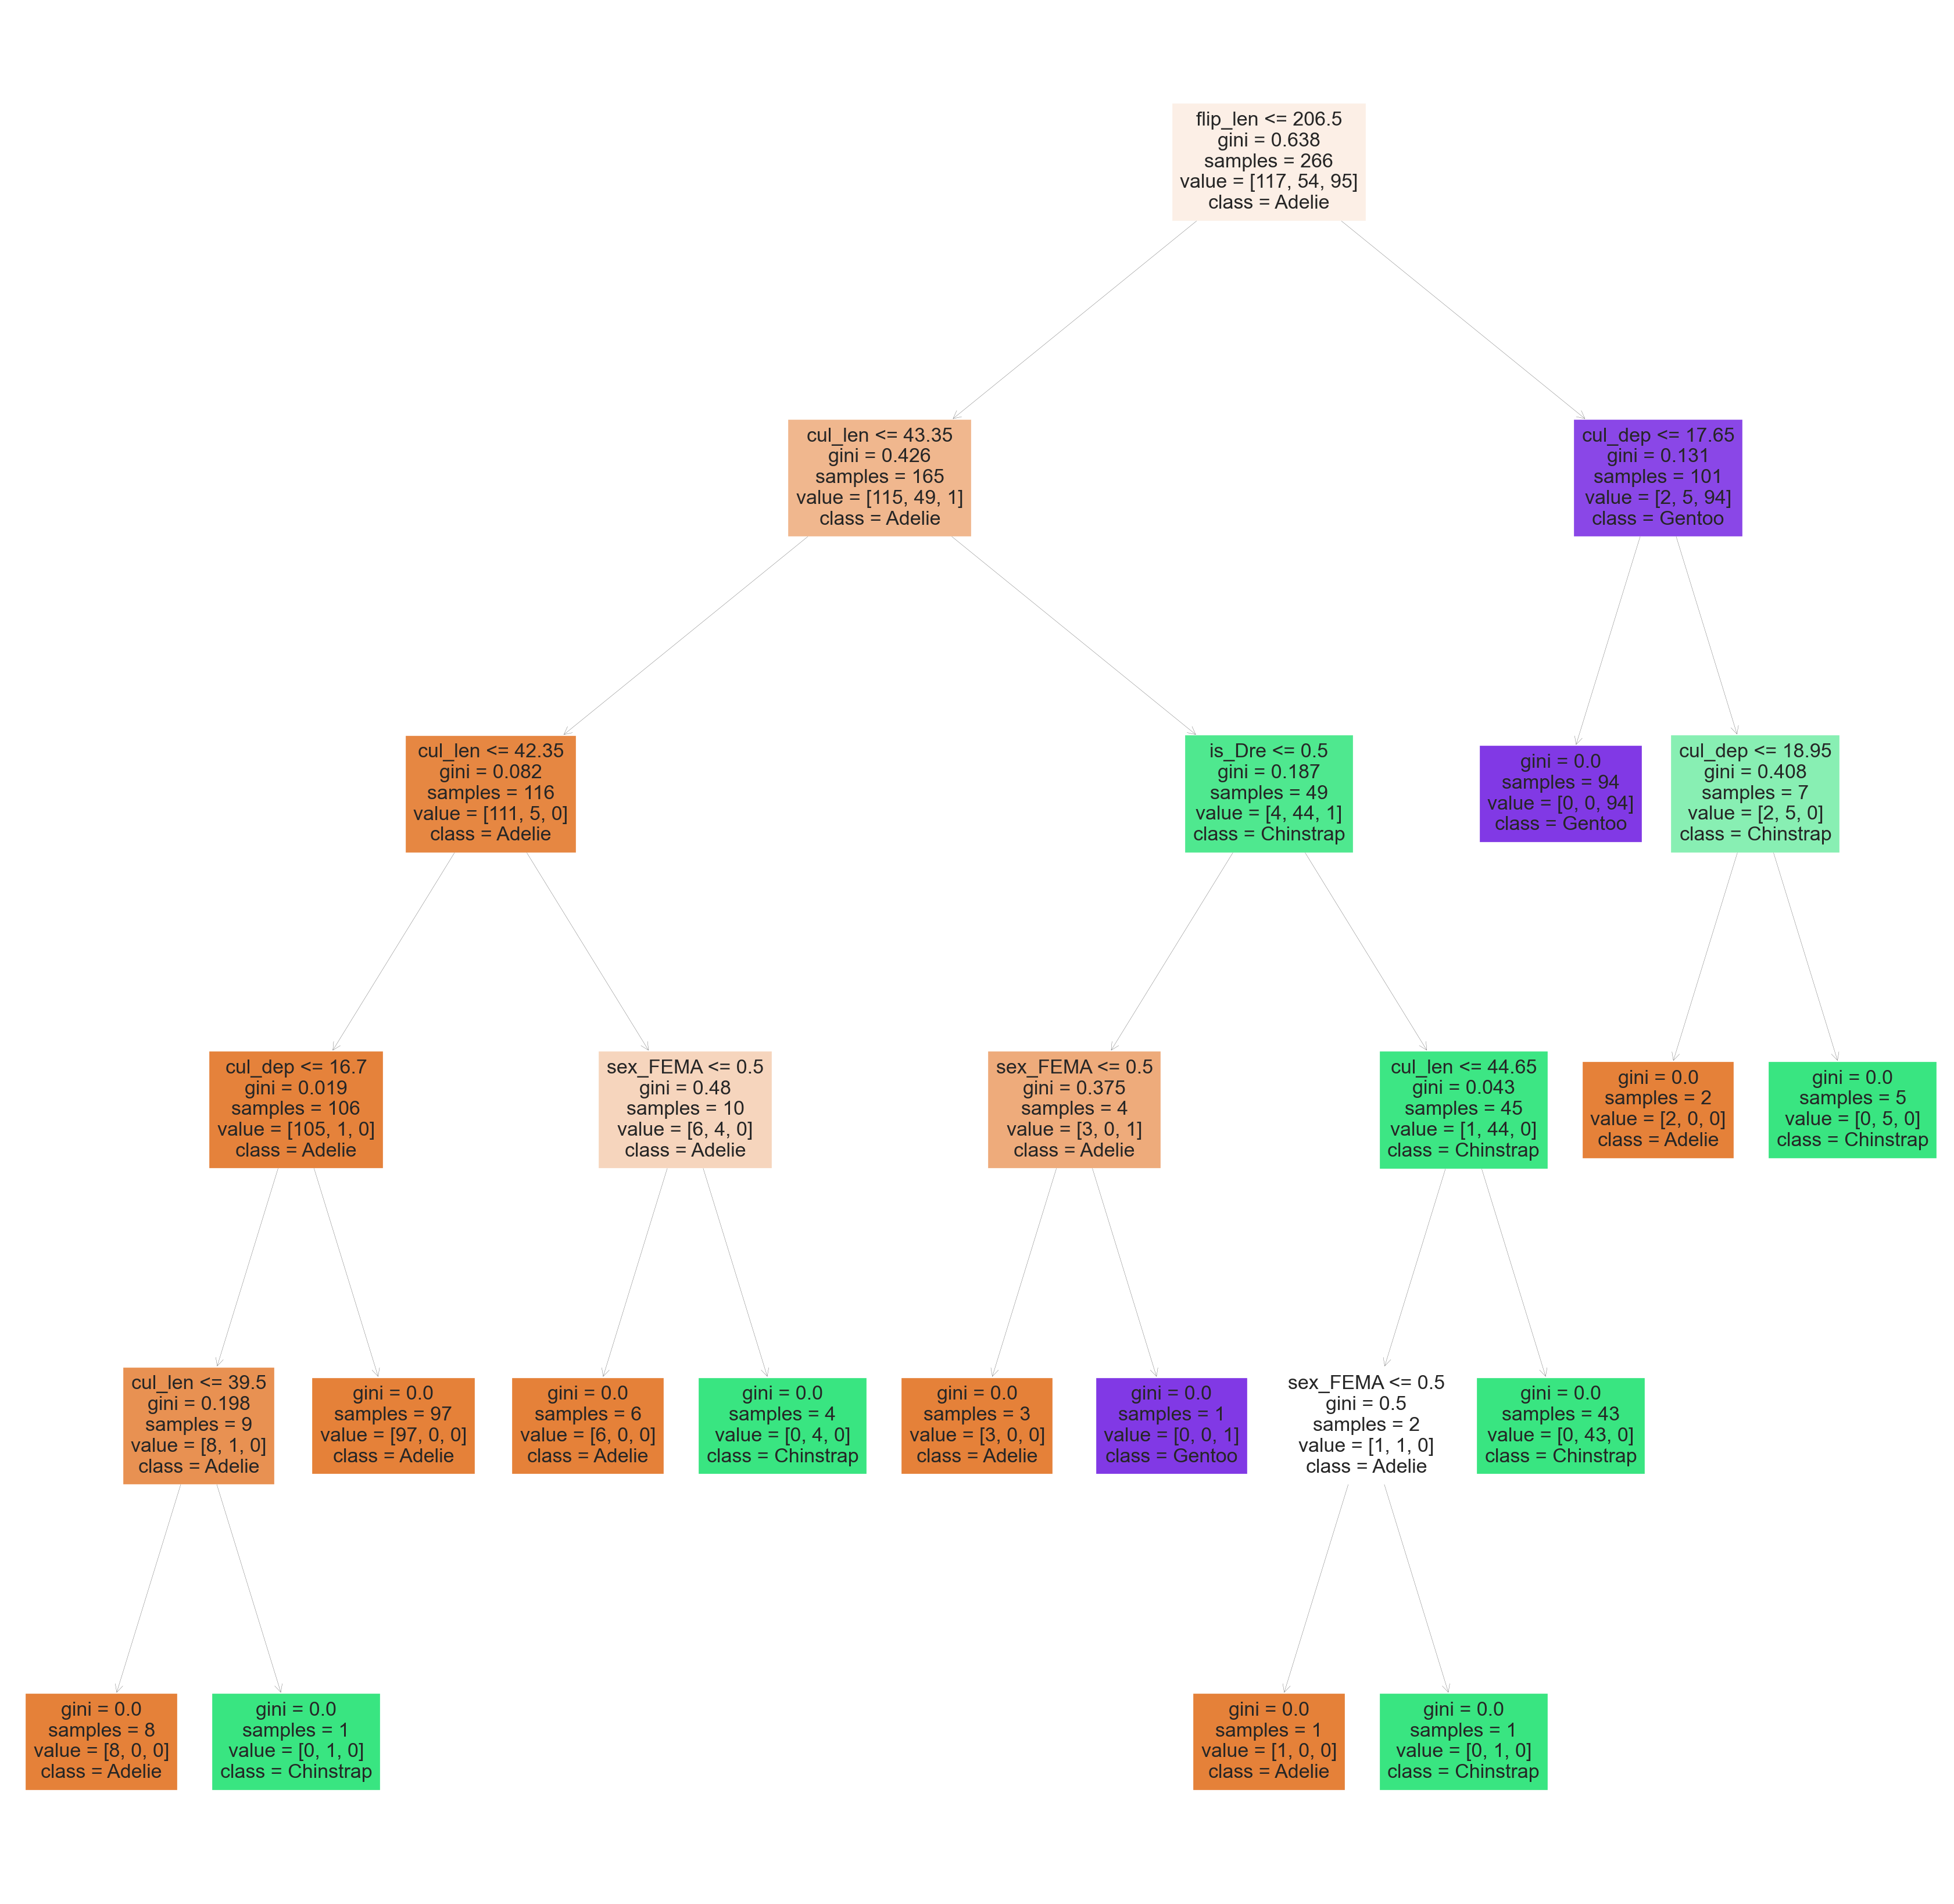

In [44]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(60,60))
_ = plot_tree(sktree_03, filled=True, proportion=False, feature_names=['is_Bis','is_Torg','is_Dre','cul_len',
       'cul_dep','flip_len','body_mass','sex_MALE','sex_FEMA'], class_names=['Adelie','Chinstrap','Gentoo'])

In [45]:
# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
sktree_03.get_depth()

5

In [46]:
score_03_train = sktree_03.score(X_train_enc, y_train, sample_weight=None)
score_03_train

1.0

In [47]:
score_03_test = sktree_03.score(X_test_enc, y_test, sample_weight=None)
score_03_test

1.0

El acierto es del 100% tanto en train como en test, esto nos indica que nuestro modelo se ha aprendido al detalle los datos de entrenamiento pero que aún así es capaz de predecir sin fallos los datos nuevos que le hemos dado de test. Con los datos que tenemos nuestro árbol funciona a la perfección, puede ser que dichos datos se puede clasificar/predecir con mucha exactitud la variable target a partir de las variables predictoras definidas. 

Un acierto muy alto en train y bajo en test nos habría definido un caso de "overfitting", pero al ser las dos tasas de acierto del 100%, se puede decir que el modelo funciona a la perfección. De todas formas este caso no es habitual y podríamos estar ante un caso de "overfitting", convendría obtener nuevos datos para proporcionárselos al modelo y comprobar si es capaz de seguir generalizando y consiguiendo esas mismas tasas de acierto a la vez.

### ÁRBOL 2 (HIPERPARÁMETROS: profundidad 3)

In [48]:
from sklearn.tree import DecisionTreeClassifier

sktree_03 = DecisionTreeClassifier(max_depth=3)
sktree_03.fit(X_train_enc, y_train)

DecisionTreeClassifier(max_depth=3)

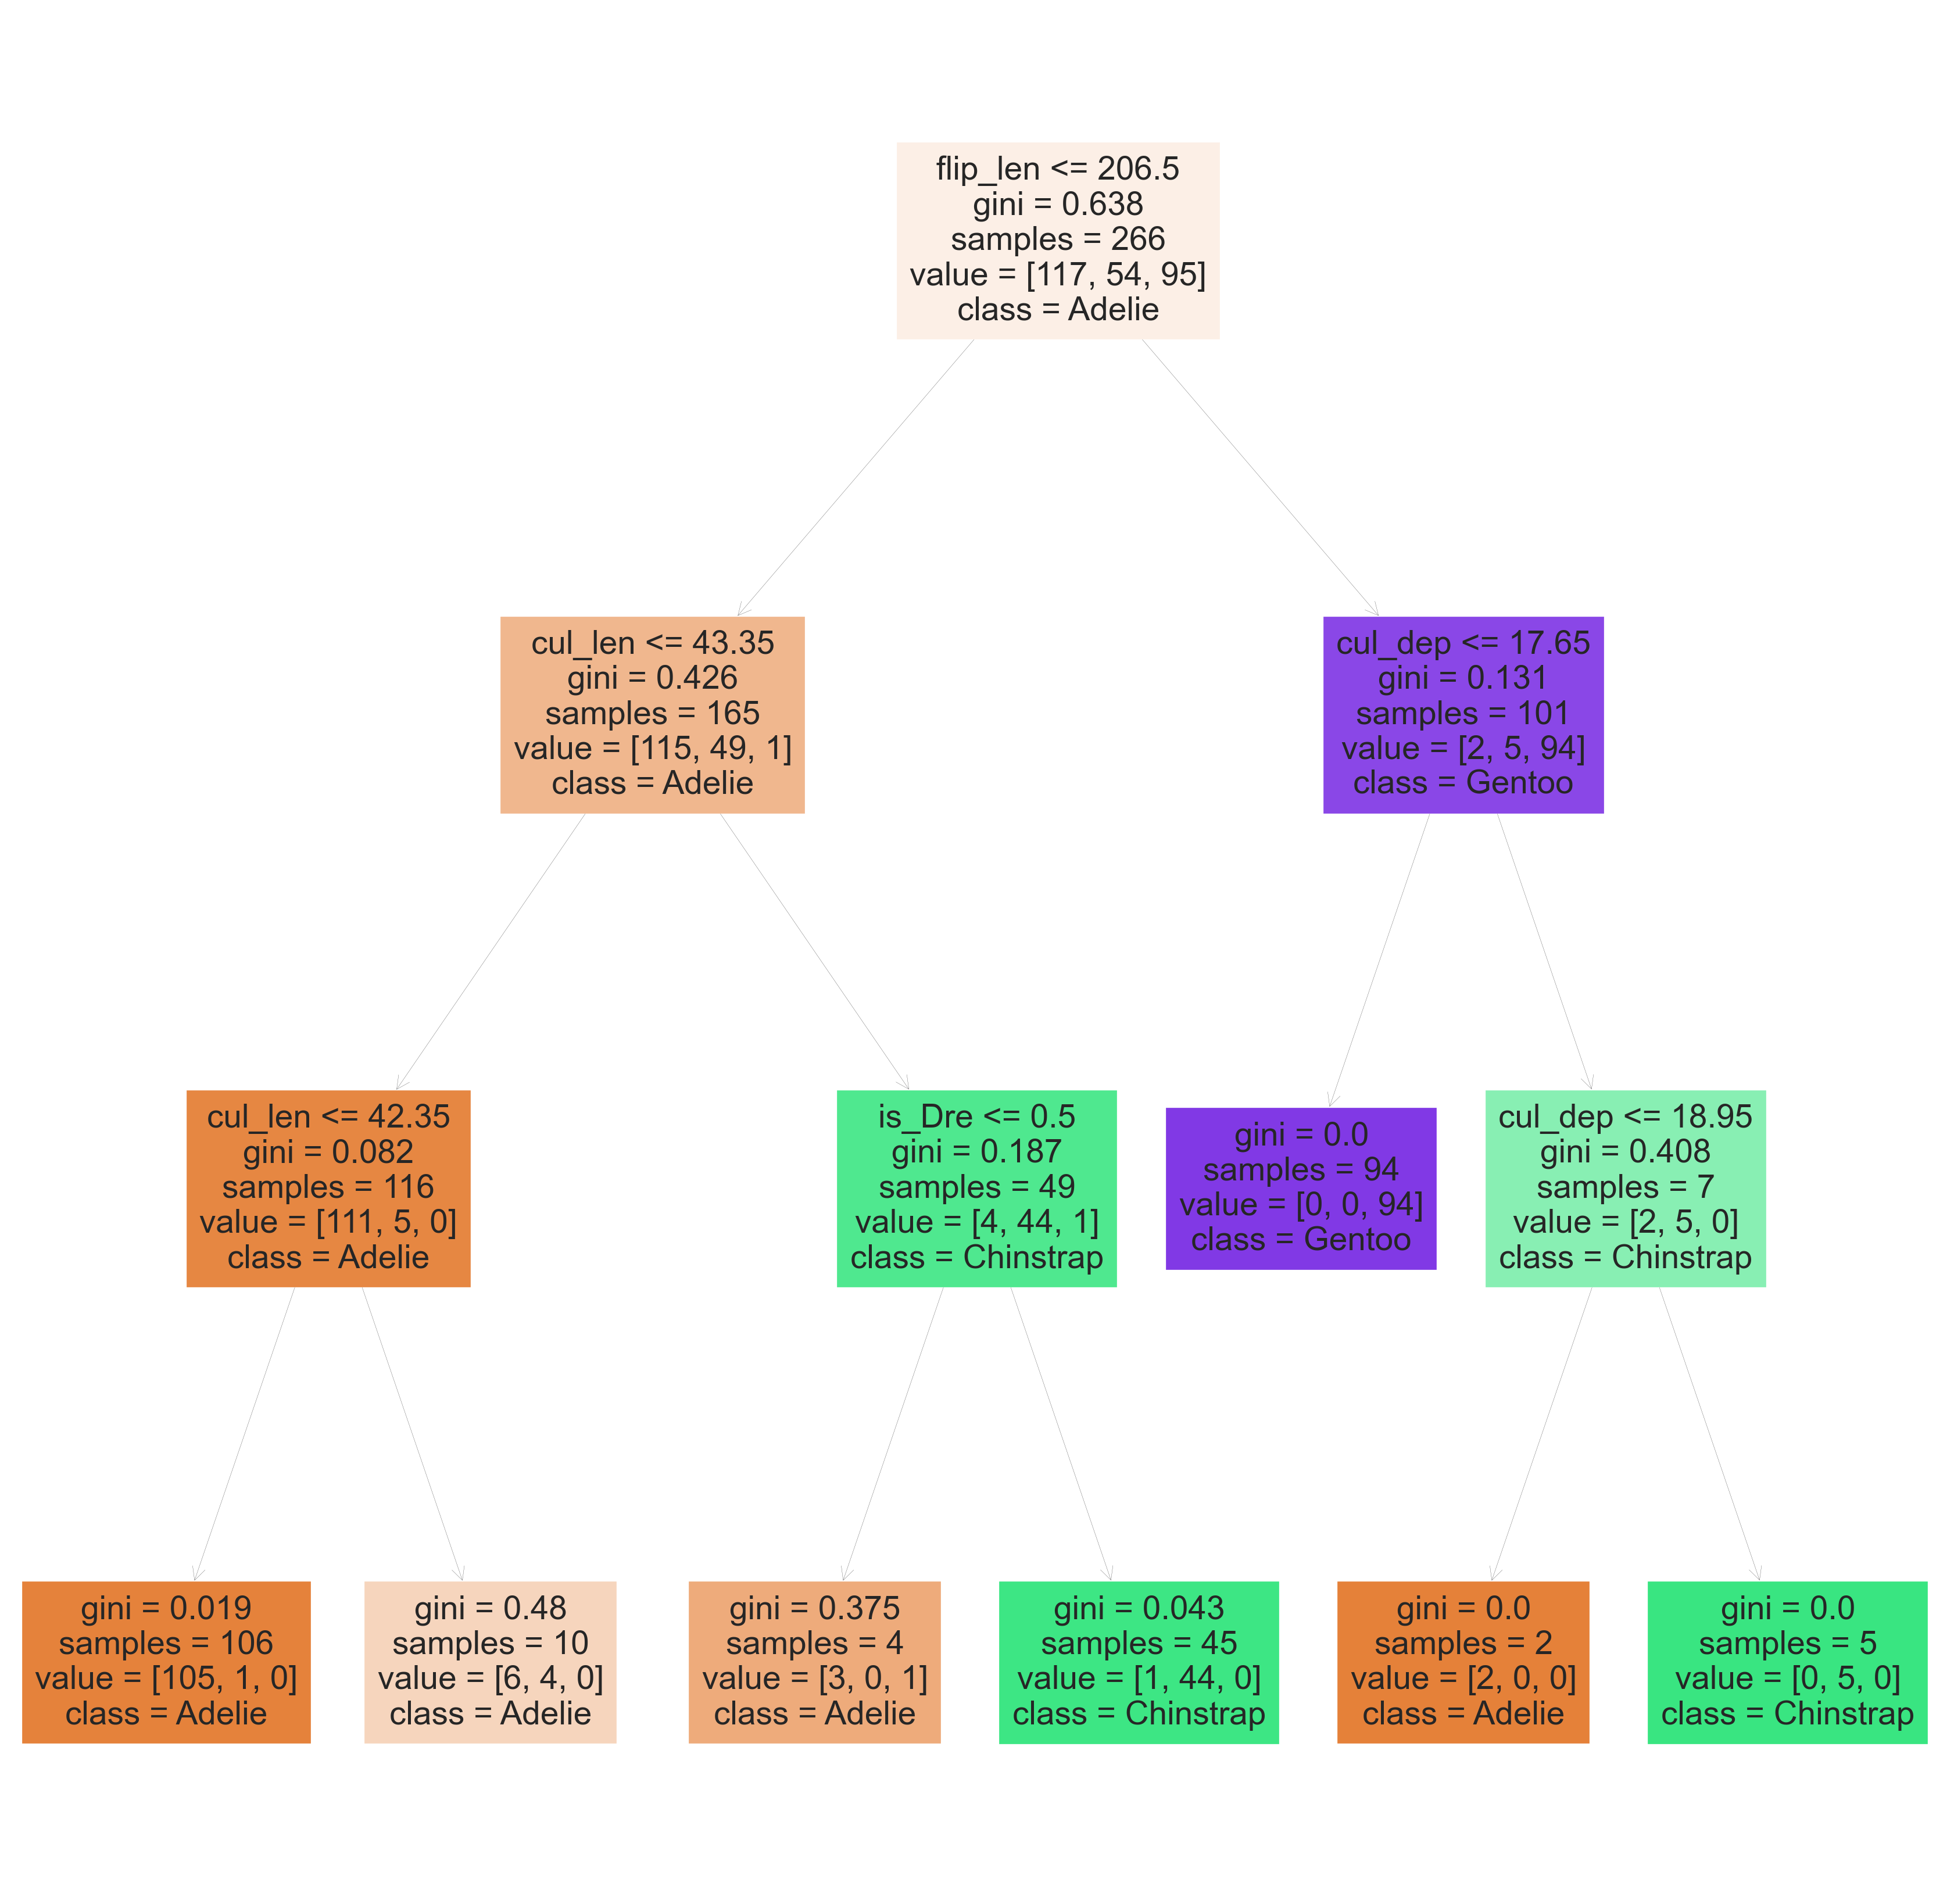

In [49]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(60,60))
_ = plot_tree(sktree_03, filled=True, proportion=False, feature_names=['is_Bis','is_Torg','is_Dre','cul_len',
       'cul_dep','flip_len','body_mass','sex_MALE','sex_FEMA'], class_names=['Adelie','Chinstrap','Gentoo'])

In [50]:
X_train_enc.columns

Index(['island_Biscoe', 'island_Torgersen', 'island_Dream', 'culmen_length_mm',
       'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_MALE',
       'sex_FEMALE'],
      dtype='object')

In [51]:
sktree_03.feature_importances_

array([0.        , 0.        , 0.03567721, 0.34105103, 0.08297929,
       0.54029247, 0.        , 0.        , 0.        ])

Revisando la visualización del árbol las principales variables que utiliza para clasificar la especie al inicio son: 'flipper_length_mm', 'culmen_length_mm', 'island_Biscoe','culmen_depth_mm'. Basándose en la longitud de las aletas, dimensiones del pico y si son o no de la isla Biscoe, el modelo es capaz sólo con eso de clasificar/predecir gran parte de los datos.

Dadas las tasas de acierto del modelo y la profundidad de los árboles obtenidos no se debería considerar este problema como my complejo.

## Regresión: Elecciones presidenciales USA 2016

En este problema vamos a tratar de predecir el resultado del voto por condado en las elecciones presidenciales de 2016 en EEUU.

Trabajaremos con una versión simplificada del [dataset original](https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/export/?disjunctive.state), en el que tendremos para cada condado diversa información sociodemográfica así como el resultado del voto.

Las variables en el dataset son:


* **target** Variable objetivo, diferencia porcentual en el voto entre republicanos y demócratas. -100 indica victoria democrata por 100 puntos porcentuales, 100 indica victoria republicana. Todos los valores se encuentran en el rango -100, 100.

* **County** Nombre del condado
* **State** Estado
* **Less Than High School Diploma** 	% Población con menos de graduado
* **At Least High School Diploma** 	% Población con al menos de graduado
* **Graduate Degree** 	% Población con educación universitaria
* **School Enrollment** 	Tasa de escolarización
* **Median Earnings 2010** 	Ingreso mediano
* **...occupations** 	% población por oficio
* **...Population** 	% población por raza
* **Children Under 6 Living in Poverty** 	Tasa por debajo del umbral de la pobreza
* **Adults 65 and Older Living in Poverty** 	Tasa por debajo del umbral de la pobreza
* **Total Population** 	Población total
* **Gini.Coefficient** 	Valor del coeficiente gini de desigualdad
* **Teen.births** 	Tasa de embarazos adolescentes
* **Adult.smoking** 	% Fumadores
* **Adult.obesity** 	% Obsidad
* **Diabetes** 	% Incidencia Diabetes
* **Sexually.transmitted.infections** 	Tasa incidencia de ETS
* **HIV.prevalence.rate** 	Tasa incidencia de VIH
* **Uninsured** 	% Población sin seguro
* **Unemployment**  Tasa de desempleo
* **Violent.crime** 	Tasa criminalidad
* **Homicide.rate** 	Tasa criminalidad
* **Injury.deaths** 	Tasa criminalidad
* **Infant.mortality** 	Tasa mortalidad infantil
* **Preschool.Enrollment.Ratio.enrolled.ages.3.and.4**  Tasa escolarización preescolar
* **Poverty.Rate.below.federal.poverty.threshold** Tasa bajo el umbral de la pobreza estatal


El siguiente código carga el conjunto de datos como un dataframe de Pandas

In [54]:
data = pd.read_csv('../data_in/usa2016.csv')

# Preprocesamiento para evitar doble enconding
data['Median Earnings 2010'] = data['Median Earnings 2010'].str.replace(r'0[.]0', '0').replace(np.nan, '(20000, 25000]')

# Eliminamos registros con el target nulo
data = data[~data.target.isna()]

print(data.columns)

Index(['County', 'State', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Gini.Coefficient', 'Teen.births', 'Adult.smoking', 'Adult.obesity',
       'Diabetes', 'Sexually.transmitted.infections', 'HIV.prevalence.rate',
       'Uninsured', 'Unemployment', 'Violent.crime', 'Homicide.rat

In [55]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data, title='USA2016', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../data_out/usa.html')

Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### ANÁLISIS VARIABLE TARGET

<AxesSubplot:>

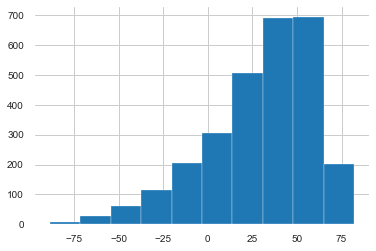

In [57]:
data["target"].hist()

In [58]:
print("Mean =", data["target"].mean())
print("Median =", data["target"].median())

Mean = 29.384958782917817
Median = 36.02957735545212


Analizando el histograma y calculando la media y mediana de la variable target, podemos afirmar que la distribución de los datos es asimétrica y que la mayoría de los condados en el dataset que tenemos son republicanos.

### ANÁLISIS DE VARIABLES PREDICTORAS

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 0 to 2815
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   County                                                      2816 non-null   object 
 1   State                                                       2816 non-null   object 
 2   Less Than High School Diploma                               2816 non-null   float64
 3   At Least High School Diploma                                2816 non-null   float64
 4   At Least Bachelors's Degree                                 2816 non-null   float64
 5   Graduate Degree                                             2816 non-null   float64
 6   School Enrollment                                           2816 non-null   float64
 7   Median Earnings 2010                                        2816 non-null   object 
 8 

In [60]:
data["County"].unique()

array(['Cherokee County, Georgia', 'Muskegon County, Michigan',
       'Harris County, Georgia', ..., 'Braxton County, West Virginia',
       'Mitchell County, North Carolina', 'Dorchester County, Maryland'],
      dtype=object)

In [61]:
data["State"].unique()

array(['Georgia', 'Michigan', 'Pennsylvania', 'Rhode Island', 'Nebraska',
       'Illinois', 'Texas', 'Virginia', 'Ohio', 'Oklahoma', 'Oregon',
       'Mississippi', 'Iowa', 'West Virginia', 'North Dakota', 'Kansas',
       'Montana', 'Minnesota', 'Missouri', 'California', 'Florida',
       'Arizona', 'Tennessee', 'North Carolina', 'Alabama', 'New Jersey',
       'Nevada', 'South Carolina', 'Wisconsin', 'Kentucky', 'Louisiana',
       'New Mexico', 'Colorado', 'Wyoming', 'Maryland', 'New York',
       'Indiana', 'South Dakota', 'Idaho', 'Utah', 'Washington',
       'Arkansas', 'New Hampshire', 'Massachusetts', 'Delaware', 'Maine',
       'Vermont', 'District of Columbia', 'Hawaii', 'Connecticut'],
      dtype=object)

In [62]:
data["Median Earnings 2010"].unique()

array(['(30000, 40000]', '(20000, 25000]', '(25000, 30000]',
       '(15000, 20000]', '(0, 15000]', '(40000, 100000]'], dtype=object)

VARIABLES PREDICTORAS (vars. categóricas):

* **County_** 	Categórica
* **State_** 	Categórica
* **Median Earnings 2010_** 	Categórica ordinal


VARIABLES PREDICTORAS (vars. continuas):

* **Resto_** 	Continuas


**Variables "County" y "State" (vars. categóricas):**

La 1ª y 2ª variables categóricas no son ordinales y tienen un nº considerable de clases, por lo que se va a utilizar el "Target Encoder" para codificar estas variables.
"Target Encoder" sustituye el valor de cada clase de la variable categórica a codificar por el valor medio de la variable target para dicha clase. La ventaja de este encoder es que elimina la necesidad de crear variables "dummies" binarias cuando hay muchas clases dentro de una variable categórica y por tanto reduce las dimensiones/complejidad del dataset. La desventaja es que reduce información y puede generar "overfitting", además de que perdemos interpretabilidad de las variables.

**Variable "Median Earnings 2010" (var. categórica ordinal):**

La 3ª variable categórica es ordinal (contiene cadenas con los rangos de ingresos medios en 2010 de cada observación). Estos rangos permiten definir un orden para las clases de la variable, por lo que se va a utilizar el "Ordinal Encoder" para codificar esta variable. La ventaja de este encoder es que mantenemos el orden las clases de la variable, la desventaja es que es aplicable en pocos casos, no admite missing values ni valores nuevos y requiere manualidad.

### CORRELACIÓN DE VARIABLES

Los árboles son uno de los mejores modelos de Machine learning a la hora de seleccionar variables y ver la importancia de las mismas, aunque altas correlaciones entre variables pueden acabar no permitiendo al modelo ver/distinguir con claridad otras variables que le podrían ayudar a generalizar mejor. Por ello, siempre se considera buena práctica el análisis de las variables y sus relaciones de manera que si hay variables con correlaciones muy grandes se puedan tener en cuenta o descartar.

Preparamos una visualización de la matriz de correlación para analizar de forma más sencilla las variables relacionadas, cantidad de relaciones y fuerza de las mismas. 

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


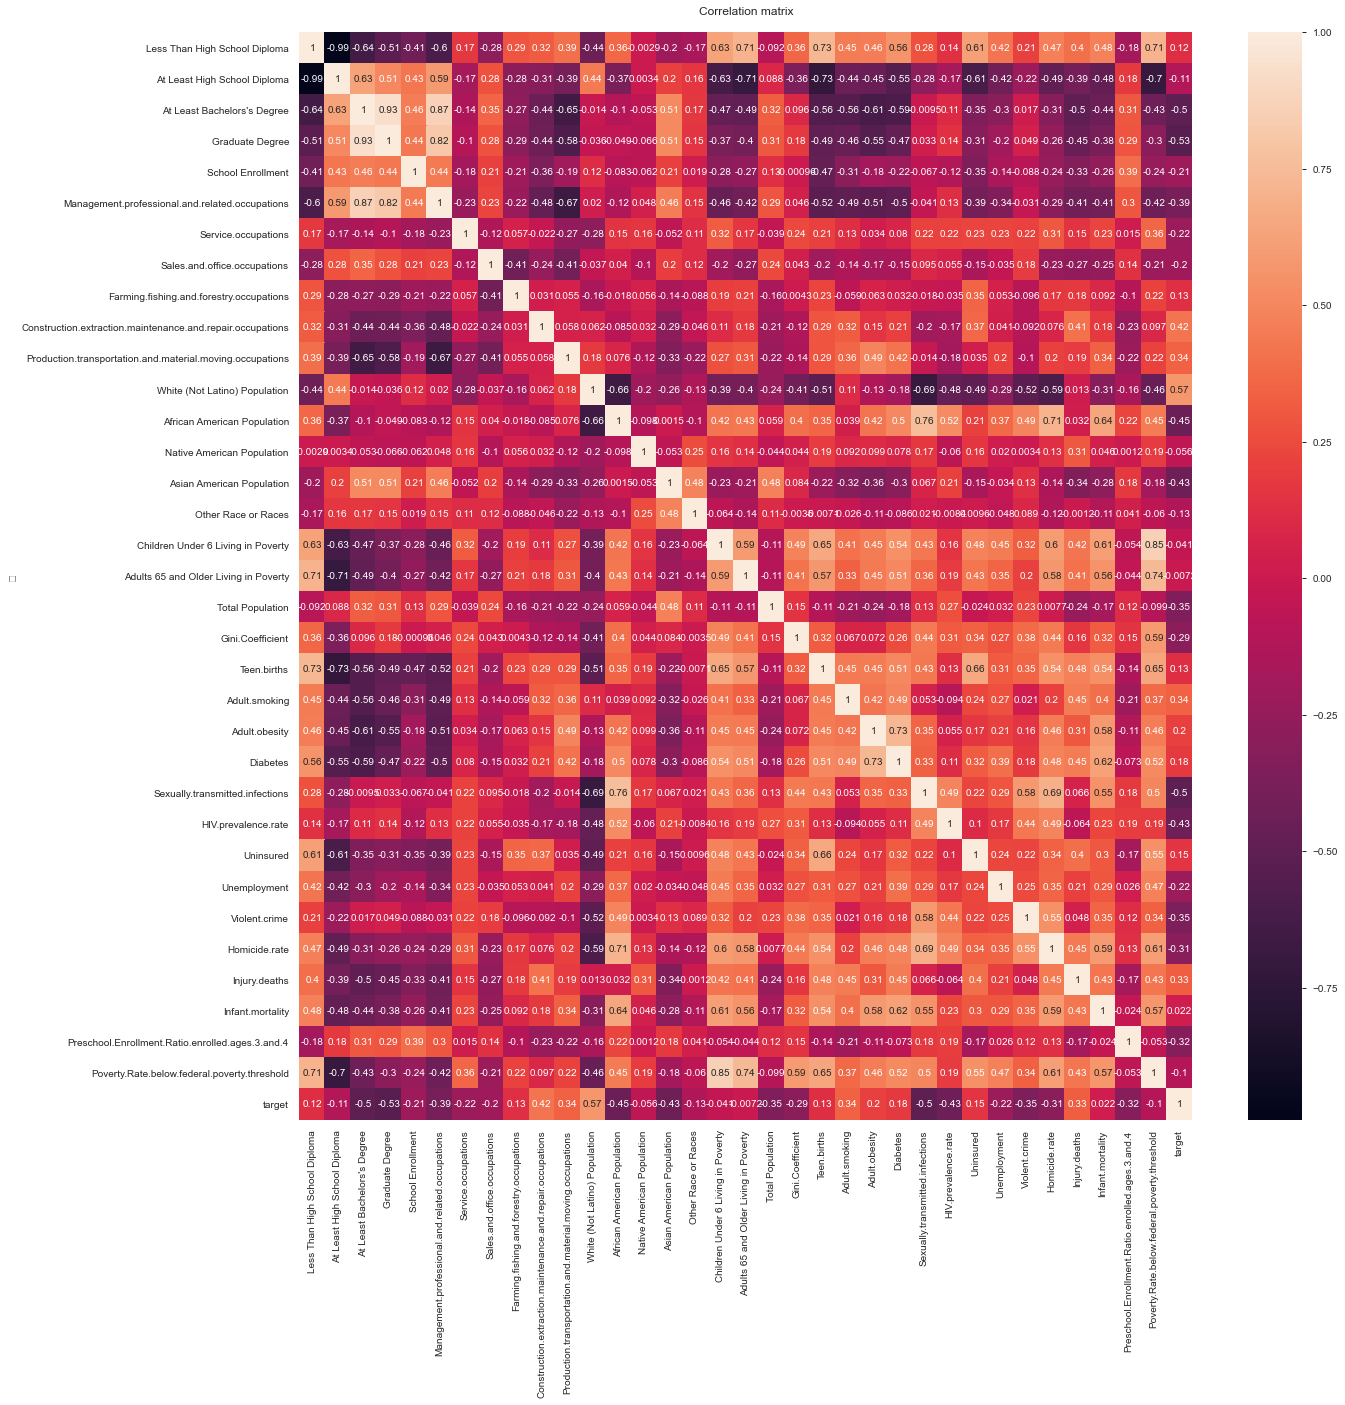

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_p = data.corr(method="pearson")

%matplotlib inline
plt.figure(figsize=(20,20))

hm = sns.heatmap(corr, annot = True)

hm.set(xlabel='\n', ylabel='\t', title = "Correlation matrix\n")

plt.show()

Dado que el nº de variables es alto, la matriz de correlaciones obtenida es muy grande y puede resultar complicado revisar los valores. Por ello sacamos una lista con los valores de la correlación entre variables en valor absoluto y ordenados de mayor a menor.

In [74]:
corr_absvals_p = corr_p.abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_absvals_p

target                                            target                                1.000000
Less Than High School Diploma                     At Least High School Diploma          0.991674
At Least Bachelors's Degree                       Graduate Degree                       0.934790
Management.professional.and.related.occupations   At Least Bachelors's Degree           0.866865
Poverty.Rate.below.federal.poverty.threshold      Children Under 6 Living in Poverty    0.853260
                                                                                          ...   
Less Than High School Diploma                     Native American Population            0.002882
African American Population                       Asian American Population             0.001539
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  Native American Population            0.001227
Other Race or Races                               Injury.deaths                         0.001156
Gini.Coefficient              

In [75]:
# Analizamos las correlaciones entre variables más fuertes:
corr_absvals_p.head(20)

target                                                     target                                             1.000000
Less Than High School Diploma                              At Least High School Diploma                       0.991674
At Least Bachelors's Degree                                Graduate Degree                                    0.934790
Management.professional.and.related.occupations            At Least Bachelors's Degree                        0.866865
Poverty.Rate.below.federal.poverty.threshold               Children Under 6 Living in Poverty                 0.853260
Graduate Degree                                            Management.professional.and.related.occupations    0.816744
African American Population                                Sexually.transmitted.infections                    0.759952
Adults 65 and Older Living in Poverty                      Poverty.Rate.below.federal.poverty.threshold       0.737459
Adult.obesity                                   

Las correlaciones más fuertes entre variables se producen en las categorías relacionadas con la educación y tiene sentido: ya que las personas con títulos superiores han tenido que obtener previamente los títulos de enseñanza básica y eso hace que estén fuertemente relacionadas. Otras correlaciones fuertes son las de las variables relacionadas con la pobreza y las variables de educación y su relación con puestos de direcció/gestión.

Dada la complejidad de la matriz de correlación y del gráfico anterior, vamos a simplificarlo seleccionando tan sólo las correlaciones entre variables mayores o iguales a 0.7 en valor absoluto. Este valor podría considerarse como un valor de correlación fuerte, por encima del cual representa unas relaciones fuertes entre las variables.

Existen varios métodos para calcular las correlaciones entre variables, en este caso vamos a utilizar dos:

- Método de "Pearson"_ Analiza correlaciones de tipo lineal, cuando existe relación lineal entre variables.

- Método de "Spearman"_ Analiza correlaciones de tipo rango, cuando existe relación entre el crecimiento de una variable y a la vez el de otra, y viceversa (no la relación lineal solamente).


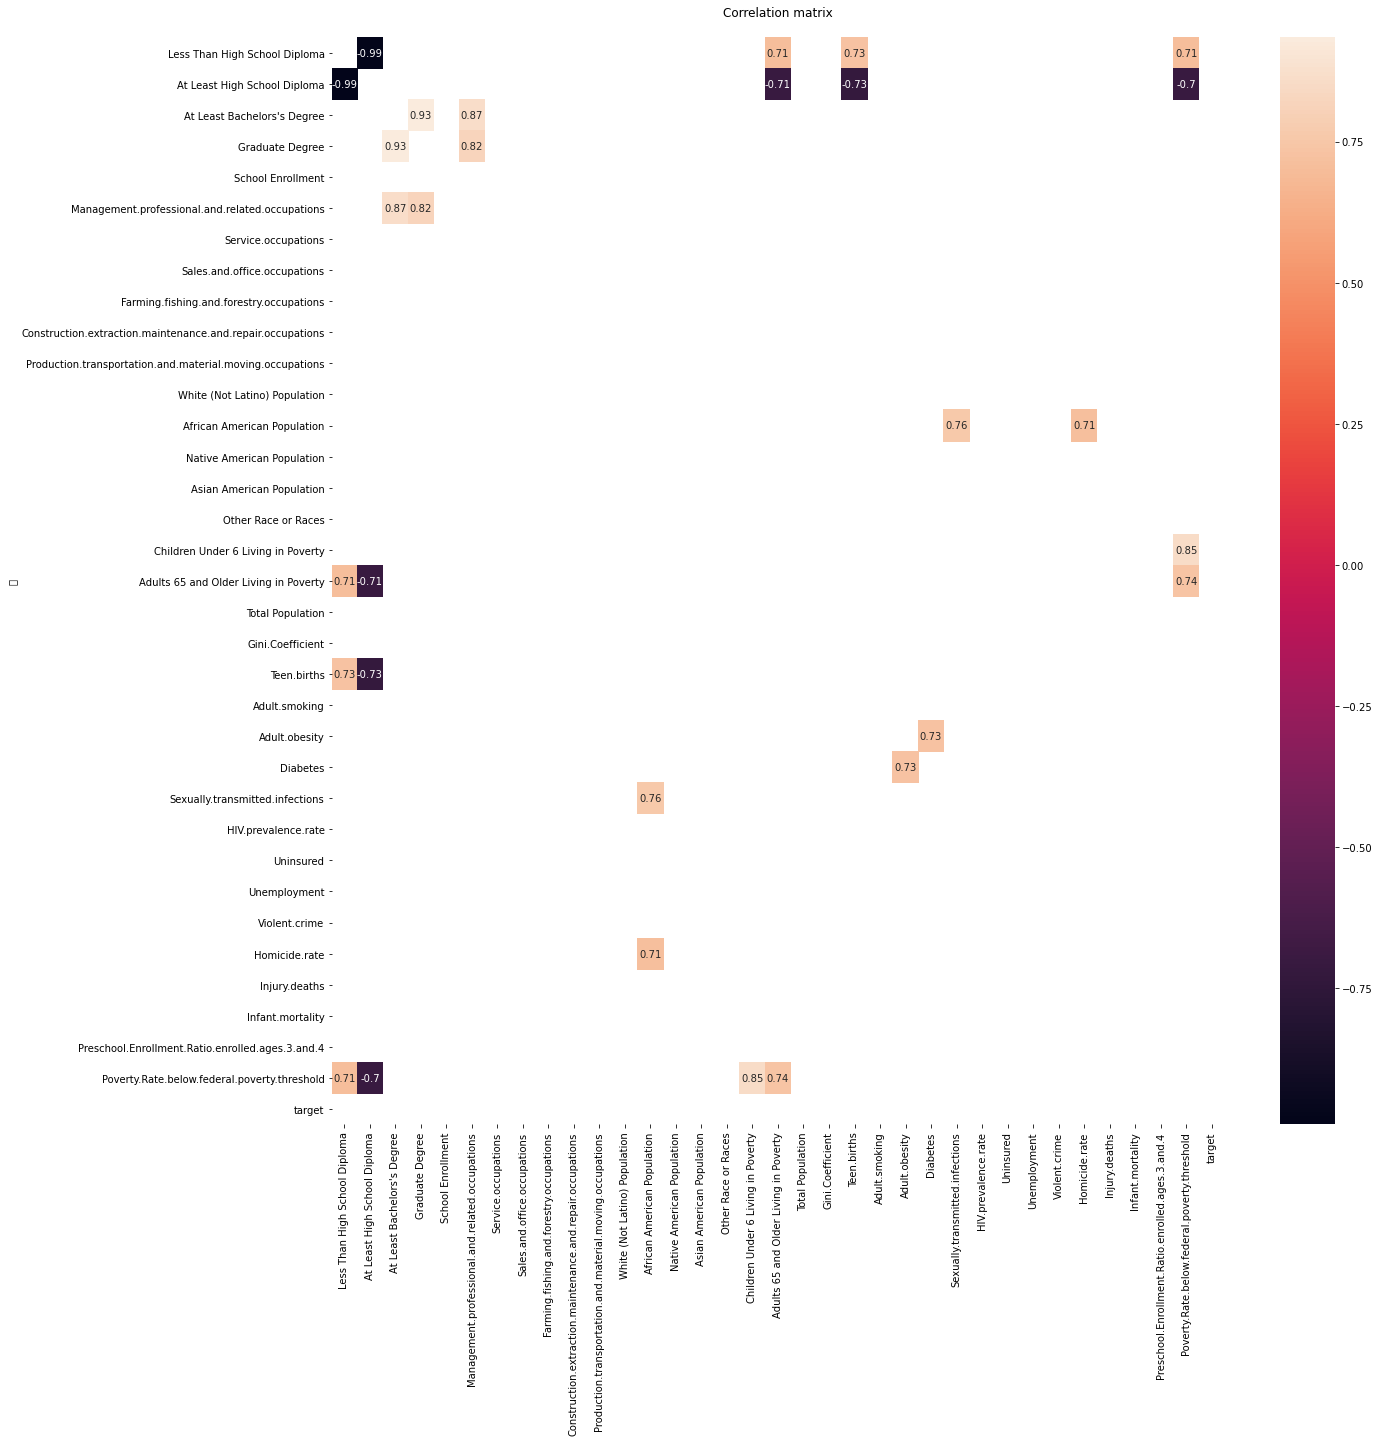

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_p = data.corr(method="pearson")

%matplotlib inline
plt.figure(figsize=(20,20))

hm = sns.heatmap(corr[((corr>=0.7) | (corr<=-0.7)) & (corr!=1.000)], annot = True)

hm.set(xlabel='\n', ylabel='\t', title = "Correlation matrix\n")

plt.show()

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


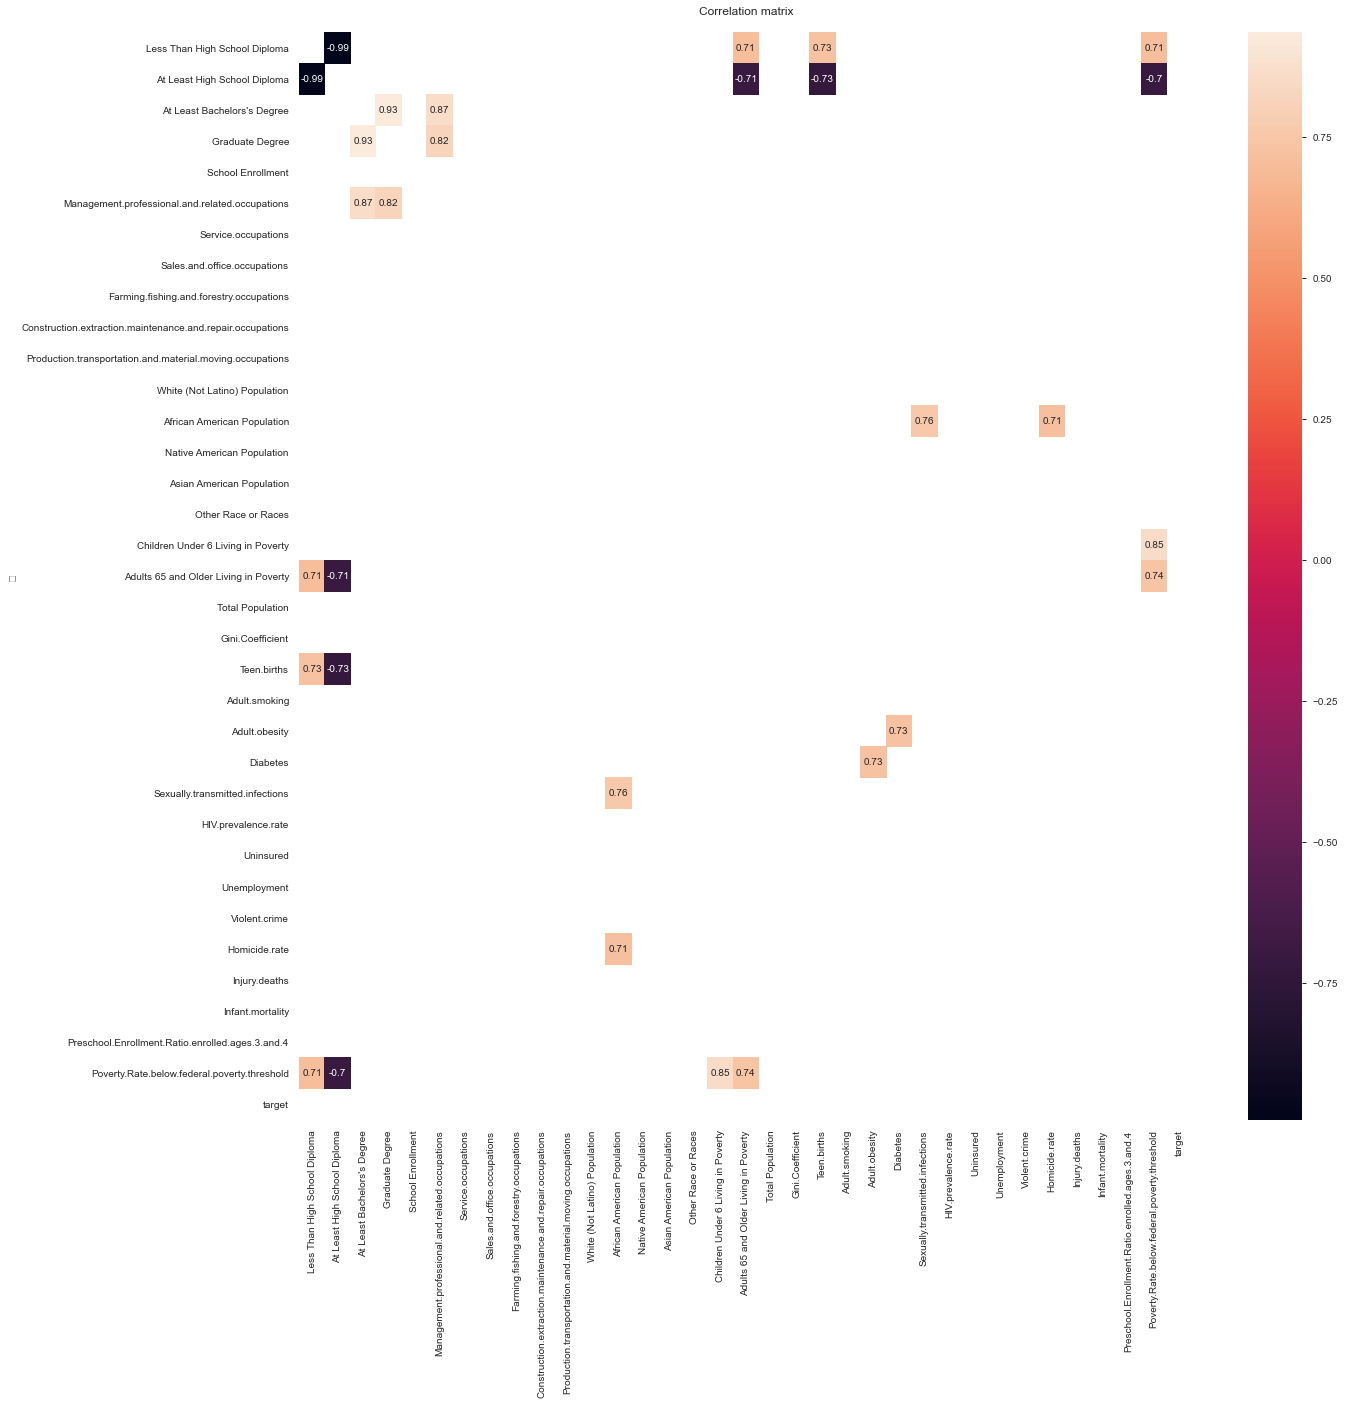

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_s = data.corr(method="spearman")

%matplotlib inline
plt.figure(figsize=(20,20))

hm = sns.heatmap(corr[((corr>=0.7) | (corr<=-0.7)) & (corr!=1.000)], annot = True)

hm.set(xlabel='\n', ylabel='\t', title = "Correlation matrix\n")

plt.show()

In [77]:
corr_absvals_s = corr_s.abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_absvals_s

target                                                      target                                          1.000000
Less Than High School Diploma                               At Least High School Diploma                    0.997997
At Least Bachelors's Degree                                 Graduate Degree                                 0.893573
Children Under 6 Living in Poverty                          Poverty.Rate.below.federal.poverty.threshold    0.849106
Management.professional.and.related.occupations             At Least Bachelors's Degree                     0.833312
                                                                                                              ...   
Other Race or Races                                         Uninsured                                       0.007901
Construction.extraction.maintenance.and.repair.occupations  Service.occupations                             0.007492
Asian American Population                                   Serv

In [78]:
# Analizamos las correlaciones entre variables más fuertes:
corr_absvals_s.head(20)

target                                                     target                                             1.000000
Less Than High School Diploma                              At Least High School Diploma                       0.997997
At Least Bachelors's Degree                                Graduate Degree                                    0.893573
Children Under 6 Living in Poverty                         Poverty.Rate.below.federal.poverty.threshold       0.849106
Management.professional.and.related.occupations            At Least Bachelors's Degree                        0.833312
Teen.births                                                At Least High School Diploma                       0.756680
                                                           Less Than High School Diploma                      0.756423
African American Population                                HIV.prevalence.rate                                0.745841
Graduate Degree                                 

Hay un nº considerable de relaciones fuertes pero se decide no descartar ninguna de las variables ya que si no se estaría perdiendo grado de definición en algunos subconjuntos de la población.

### SUBCONJUNTOS DE DATOS (TRAIN & TEST)

Realizamos una partición aleatoria de training y test de los datos, usando una partición NO ESTRATIFICADA en la que el 70% de los datos se usarán para entrenamiento y el 30% de datos restantes para test.

Aplicaremos a su vez un preprocesamiento de los datos en los que:
 - Codificamos las variables categóricas del dataset.
 - Imputamos los missing values en el dataset utilizando el simpleImputer de sklearn con el valor de la mediana.

In [90]:
# Eliminamos State para simplificar y County por ser un ID
df_X = data.drop(columns=['target', 'State', 'County'])
df_y = data.target

In [91]:
# El siguiente array puede ser de utilidad
earnings_categories = [[
    '(0, 15000]', '(15000, 20000]', '(20000, 25000]', '(25000, 30000]', '(30000, 40000]', '(40000, 100000]'
]]

Realizamos un preprocesado de los datos analizando los "missing values", imputando valores si es necesario, y estudiando las transformaciones necesarias para las variables del dataset.

Empezamos analizando las variables del dataset y revisando los "missing values" presentes en cada una de ellas:

In [92]:
# Revisamos las observaciones con Na's:
col_nulls = df_X.isnull().sum()
col_perc = (col_nulls/df_X.shape[0])*100

nulls_data = pd.concat((col_nulls, col_perc), axis=1, keys=["N_nulls", "Perc_nulls"])
nulls_data[nulls_data["N_nulls"]!=0]

,N_nulls,Perc_nulls
Adult.smoking,274,9.730114
Sexually.transmitted.infections,21,0.745739
HIV.prevalence.rate,518,18.394886
Violent.crime,115,4.083807
Homicide.rate,1571,55.788352
Injury.deaths,46,1.633523
Infant.mortality,1409,50.035511


En los resultados se puede observar que hay 3 variables con porcentajes elevados de "missing values" (18.39%, 55.79% y 50.04%). Dados dichos porcentajes no se considera conveniente imputar valores para esas variables ya que se estaría alterando considerablemente la distribución de las mismas afectando a su validez como variables reales.
Por ello se van a descartar las variables mencionadas: "HIV.prevalence.rate", "Homicide.rate" e "Infant.mortality".

Existen otras 4 variables con porcentajes de "missing values" más reducidos (9.73%, 0.75%, 4.08% y 1.63%) en las que se puede considerar la opción de completar los datos mediante algún tipo de imputación de valores.
Para estas variables se va a imputar el valor de la mediana de sus correspondientes distribucciones. Dichas variables son: "Adult.smoking", "Sexually.transmitted.infections", "Violent.crime" y "Injury.deaths".

In [93]:
df_X = df_X.loc[:, ~df_X.columns.isin(["HIV.prevalence.rate","Homicide.rate","Infant.mortality"])]

In [94]:
# Revisamos las observaciones con Na's:
col_nulls = df_X.isnull().sum()
col_perc = (col_nulls/df_X.shape[0])*100

nulls_data = pd.concat((col_nulls, col_perc), axis=1, keys=["N_nulls", "Perc_nulls"])
nulls_data[nulls_data["N_nulls"]!=0]

,N_nulls,Perc_nulls
Adult.smoking,274,9.730114
Sexually.transmitted.infections,21,0.745739
Violent.crime,115,4.083807
Injury.deaths,46,1.633523


In [95]:
# Revisamos las observaciones con Na's:
na_rows = df_X[df_X.isna().any(axis=1)]
na_rows.shape

(412, 32)

Imputamos los "missing values" pero primero separamos la variable categórica restante

In [96]:
df_X_cont = df_X.loc[:, ~df_X.columns.isin(["Median Earnings 2010"])]
cols_names_cont = df_X_cont.columns
df_X_cat = df_X.loc[:, df_X.columns.isin(["Median Earnings 2010"])]

print(df_X_cont.shape)
print(df_X_cat.shape)

(2816, 31)
(2816, 1)


In [97]:
# Imputamos los "missing values":
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_X_cont = simple_imputer.fit_transform(df_X_cont)
df_X_cont

array([[11.1 , 88.9 , 33.6 , ..., 45.  , 61.2 ,  7.25],
       [12.3 , 87.7 , 16.5 , ..., 65.6 , 47.9 , 17.35],
       [11.5 , 88.5 , 27.4 , ..., 57.2 , 47.1 ,  9.6 ],
       ...,
       [26.1 , 73.9 ,  9.5 , ..., 83.8 , 38.7 , 20.75],
       [23.5 , 76.5 , 14.4 , ..., 96.9 , 55.8 , 16.65],
       [19.  , 81.  , 16.5 , ..., 67.5 , 50.9 , 13.35]])

In [98]:
df_X_cont = pd.DataFrame(df_X_cont, columns=cols_names_cont)
df_X_cont

,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,...,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold
0,11.1,88.9,33.6,9.1,80.30,39.50,12.70,28.85,0.20,10.80,...,0.167,0.279,0.087,176.8,0.183,0.072,94.58,45.0,61.2,7.25
1,12.3,87.7,16.5,5.5,76.20,26.55,18.00,24.35,0.85,7.95,...,0.265,0.355,0.119,705.2,0.136,0.088,437.18,65.6,47.9,17.35
2,11.5,88.5,27.4,10.7,82.45,42.55,11.80,26.30,0.55,9.75,...,0.185,0.282,0.127,223.2,0.148,0.068,76.21,57.2,47.1,9.60
3,13.1,86.9,12.0,3.9,71.85,22.95,17.20,21.75,0.90,13.00,...,0.261,0.292,0.130,149.0,0.139,0.079,203.70,76.0,29.1,13.50
4,21.0,79.0,25.6,10.1,78.40,33.30,19.20,25.40,0.15,7.50,...,0.171,0.273,0.089,527.7,0.153,0.112,341.24,58.1,41.7,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,20.1,79.9,11.9,3.5,75.50,22.55,15.80,24.00,0.60,9.60,...,0.264,0.321,0.132,443.5,0.159,0.133,319.16,80.9,52.6,14.90
2812,12.4,87.6,21.8,7.6,80.25,32.50,16.75,27.50,0.10,8.30,...,0.186,0.300,0.108,231.6,0.139,0.104,315.70,58.0,45.9,9.35
2813,26.1,73.9,9.5,3.1,66.95,20.70,20.40,20.50,1.85,21.15,...,0.240,0.340,0.144,82.8,0.207,0.095,210.11,83.8,38.7,20.75
2814,23.5,76.5,14.4,4.9,73.65,24.10,16.10,18.35,2.60,16.50,...,0.260,0.291,0.116,103.6,0.196,0.118,213.30,96.9,55.8,16.65


In [99]:
# Revisamos las observaciones con Na's:
col_nulls = df_X_cont.isnull().sum()
col_perc = (col_nulls/df_X_cont.shape[0])*100

nulls_data = pd.concat((col_nulls, col_perc), axis=1, keys=["N_nulls", "Perc_nulls"])
nulls_data[nulls_data["N_nulls"]!=0]

,N_nulls,Perc_nulls


In [100]:
df_X = pd.concat([df_X_cat, df_X_cont], axis=1)
df_X

,Median Earnings 2010,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,...,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold
0,"(30000, 40000]",11.1,88.9,33.6,9.1,80.30,39.50,12.70,28.85,0.20,...,0.167,0.279,0.087,176.8,0.183,0.072,94.58,45.0,61.2,7.25
1,"(20000, 25000]",12.3,87.7,16.5,5.5,76.20,26.55,18.00,24.35,0.85,...,0.265,0.355,0.119,705.2,0.136,0.088,437.18,65.6,47.9,17.35
2,"(30000, 40000]",11.5,88.5,27.4,10.7,82.45,42.55,11.80,26.30,0.55,...,0.185,0.282,0.127,223.2,0.148,0.068,76.21,57.2,47.1,9.60
3,"(20000, 25000]",13.1,86.9,12.0,3.9,71.85,22.95,17.20,21.75,0.90,...,0.261,0.292,0.130,149.0,0.139,0.079,203.70,76.0,29.1,13.50
4,"(25000, 30000]",21.0,79.0,25.6,10.1,78.40,33.30,19.20,25.40,0.15,...,0.171,0.273,0.089,527.7,0.153,0.112,341.24,58.1,41.7,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,"(20000, 25000]",20.1,79.9,11.9,3.5,75.50,22.55,15.80,24.00,0.60,...,0.264,0.321,0.132,443.5,0.159,0.133,319.16,80.9,52.6,14.90
2812,"(30000, 40000]",12.4,87.6,21.8,7.6,80.25,32.50,16.75,27.50,0.10,...,0.186,0.300,0.108,231.6,0.139,0.104,315.70,58.0,45.9,9.35
2813,"(20000, 25000]",26.1,73.9,9.5,3.1,66.95,20.70,20.40,20.50,1.85,...,0.240,0.340,0.144,82.8,0.207,0.095,210.11,83.8,38.7,20.75
2814,"(20000, 25000]",23.5,76.5,14.4,4.9,73.65,24.10,16.10,18.35,2.60,...,0.260,0.291,0.116,103.6,0.196,0.118,213.30,96.9,55.8,16.65


Ya hemos tratado los "missing values" presentes en el dataset inicial, a continuación pasamos a codificar la variables categórica ordinal restante.

**Variable "Median Earnings 2010" (var. categórica ordinal):**

La 3ª variable categórica es ordinal (contiene cadenas con los rangos de ingresos medios en 2010 de cada observación). Estos rangos permiten definir un orden para las clases de la variable, por lo que se va a utilizar el "Ordinal Encoder" para codificar esta variable. La ventaja de este encoder es que mantenemos el orden las clases de la variable, la desventaja es que es aplicable en pocos casos, no admite missing values ni valores nuevos y requiere manualidad.

In [101]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(dtype=np.float64)
df_X = ord_encoder.fit_transform(df_X)
df_X

array([[  4.,  72., 267., ..., 103., 472.,  66.],
       [  2.,  84., 255., ..., 303., 341., 267.],
       [  4.,  76., 263., ..., 219., 333., 112.],
       ...,
       [  2., 222., 117., ..., 482., 249., 335.],
       [  2., 196., 143., ..., 606., 420., 253.],
       [  3., 151., 188., ..., 321., 371., 187.]])

In [102]:
cols_names = cols_names_cont.insert(0,"Median Earnings 2010")

In [103]:
df_X = pd.DataFrame(df_X, columns=cols_names)
df_X

,Median Earnings 2010,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,...,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold
0,4.0,72.0,267.0,276.0,78.0,358.0,422.0,46.0,276.0,4.0,...,88.0,113.0,46.0,484.0,125.0,51.0,426.0,103.0,472.0,66.0
1,2.0,84.0,255.0,106.0,42.0,276.0,168.0,152.0,186.0,17.0,...,186.0,189.0,78.0,1964.0,78.0,67.0,2191.0,303.0,341.0,267.0
2,4.0,76.0,263.0,215.0,94.0,401.0,465.0,29.0,225.0,11.0,...,106.0,116.0,86.0,740.0,90.0,47.0,313.0,219.0,333.0,112.0
3,2.0,92.0,247.0,61.0,26.0,189.0,96.0,136.0,134.0,18.0,...,182.0,126.0,89.0,345.0,81.0,58.0,1247.0,406.0,153.0,190.0
4,3.0,171.0,168.0,197.0,88.0,320.0,303.0,176.0,207.0,3.0,...,92.0,107.0,48.0,1731.0,95.0,91.0,1927.0,228.0,279.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2.0,162.0,177.0,60.0,22.0,262.0,88.0,108.0,179.0,12.0,...,185.0,155.0,91.0,1569.0,101.0,112.0,1846.0,454.0,388.0,218.0
2812,4.0,85.0,254.0,159.0,63.0,357.0,287.0,127.0,249.0,2.0,...,107.0,134.0,67.0,787.0,81.0,83.0,1836.0,227.0,321.0,107.0
2813,2.0,222.0,117.0,36.0,18.0,94.0,53.0,200.0,109.0,37.0,...,161.0,174.0,103.0,85.0,149.0,74.0,1289.0,482.0,249.0,335.0
2814,2.0,196.0,143.0,85.0,36.0,225.0,119.0,114.0,66.0,52.0,...,181.0,125.0,75.0,146.0,138.0,97.0,1306.0,606.0,420.0,253.0


Ya hemos realizado la preprocesamiento de los datos, ahora procedemos a dividir los datos en los subconjuntos de "train" y "test".
- Partición NO ESTRATIFICADA en la que el 70% de los datos se usarán para entrenamiento y el 30% de datos restantes para test.

- Utiliza como semilla aleatoria (random_state) el entero 2016.

- Comprobar el tamaño de los subconjuntos obtenidos.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify=None, test_size=0.3, random_state=2016) 

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1971, 32)
(1971,)
(845, 32)
(845,)


### AJUSTE DE HIPERPARÁMETROS

Ajustamos los hiperparámetros del árbol mediante un proceso MANUAL iterativo, probando los hiperparámetros del árbol hasta que obtengas un coeficiente de determinación (R2, el output por defecto de la función score del árbol) cercano a 0.6 en el conjunto de test.

Defino tan solo la profundidad del árbol y le doy un valor considerable para analizar los resultados.

DecisionTreeRegressor(max_depth=30, random_state=2016)
Score = 0.5175741608641719
24


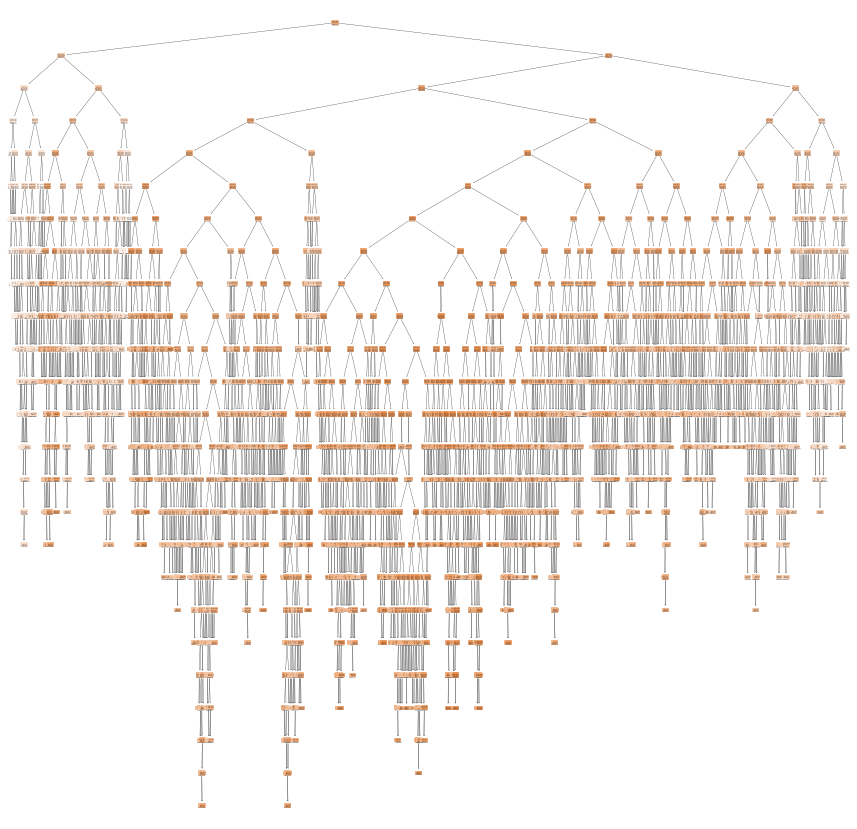

In [116]:
from sklearn.tree import DecisionTreeRegressor

sktree = DecisionTreeRegressor(max_depth=30, random_state=2016)
print(sktree.fit(X_train, y_train))

score = sktree.score(X_test, y_test, sample_weight=None)
print("Score =", score)

# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
print(sktree.get_depth())

%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree, filled = True, proportion = False)

Reduzco la profundidad del árbol y le añado una restricción al nº mínimo de elementos por hoja, ambos parámetros van a reducir las dimensiones y complejidad del árbol (analizamos los resultados para ver si mejora el modelo).

DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, random_state=2016)
Score = 0.6323203883650058
14


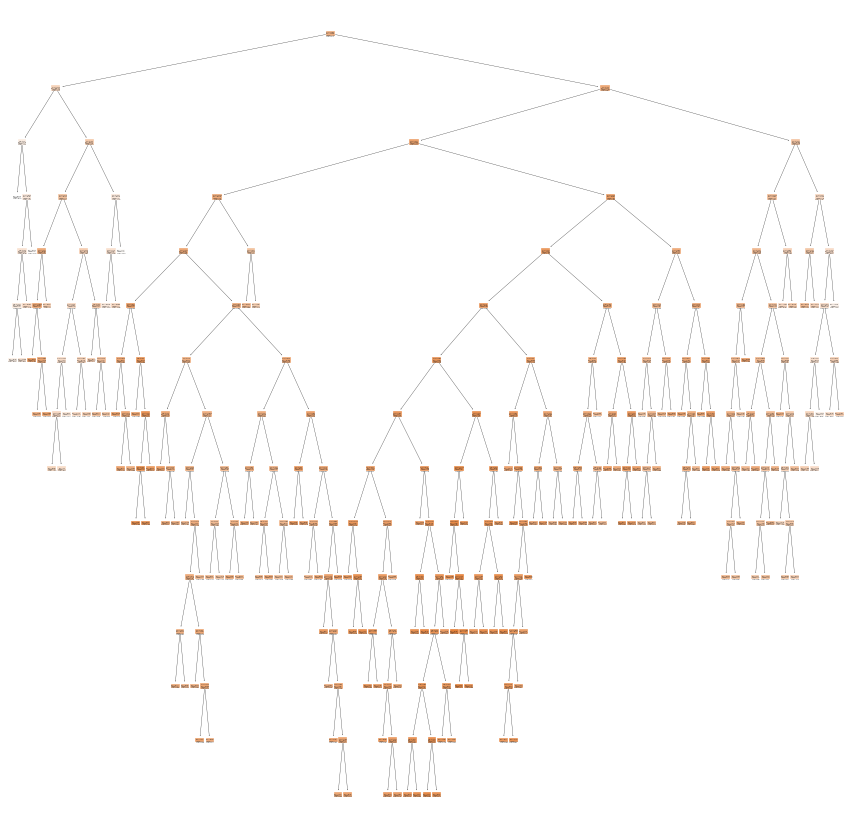

In [117]:
from sklearn.tree import DecisionTreeRegressor

sktree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, random_state=2016)
print(sktree.fit(X_train, y_train))

score = sktree.score(X_test, y_test, sample_weight=None)
print("Score =", score)

# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
print(sktree.get_depth())

%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree, filled = True, proportion = False)

La reducción en las dimensiones y complejidad del árbol parece que ha supuesto una mejora por lo que vamos a tratar de seguir reduciendo y también balanceando el árbol. 

En el paso anterior ya hemos conseguido el objetivo de alcanzar un coeficiente de determinación (R2, el output por defecto de la función score del árbol) superior al 0.6, pero vamos a seguir revisando otros parámetros para tratar de mejorar los resultados. Para ello reducimos la profundidad del árbol, reducimos el nº mínimo de elementos por hoja y anadimos una restricción para el nº mínimo de elemento que precisa tener un nodo para poder realizar una división.

DecisionTreeRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=21,
                      random_state=2016)
Score = 0.6445829460271395
10


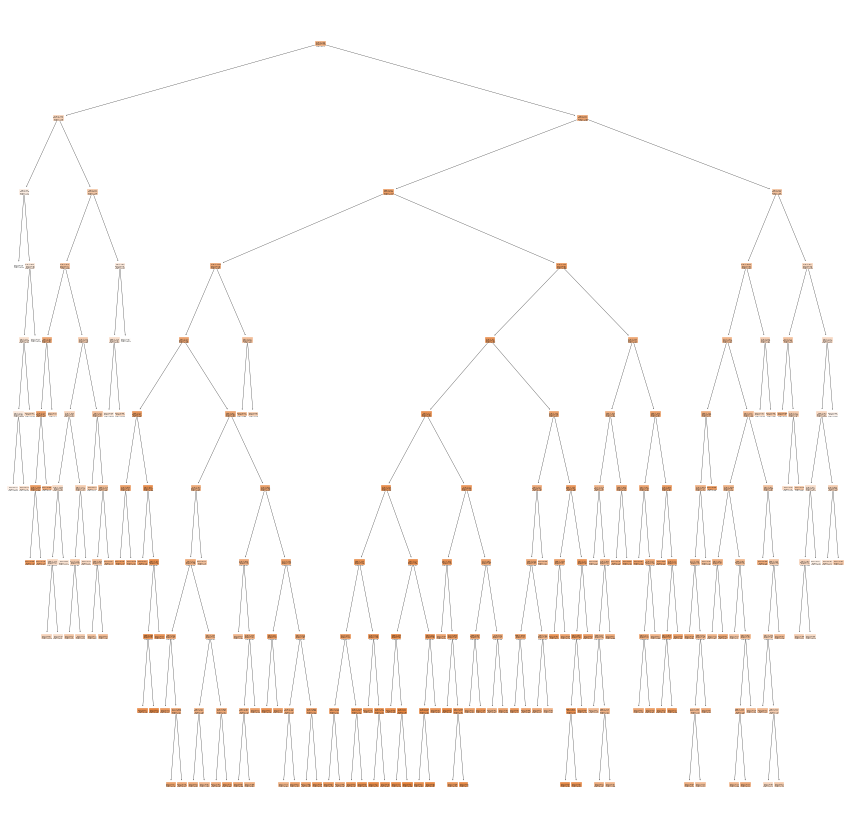

In [118]:
from sklearn.tree import DecisionTreeRegressor

sktree = DecisionTreeRegressor(max_depth=10, min_samples_split=21, min_samples_leaf=7, random_state=2016)
print(sktree.fit(X_train, y_train))

score = sktree.score(X_test, y_test, sample_weight=None)
print("Score =", score)

# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
print(sktree.get_depth())

%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree, filled = True, proportion = False)

La reducción en las dimensiones y complejidad del árbol parece seguir suponiendo una mejora. En este último paso, a parte de reducir un poco más la profundidad del árbol, el nº mínimo de elementos por hoja y el nº mínimo de elemento para una división, vamos a añadir el parámetro "alpha" que asigna un coste a cada nodo del árbol y analiza la complejidad añadida por la división de un nodo frente a la mejora del modelo.

DecisionTreeRegressor(ccp_alpha=0.001, max_depth=7, min_samples_leaf=5,
                      min_samples_split=12, random_state=2016)
Score = 0.6676248987869455
7


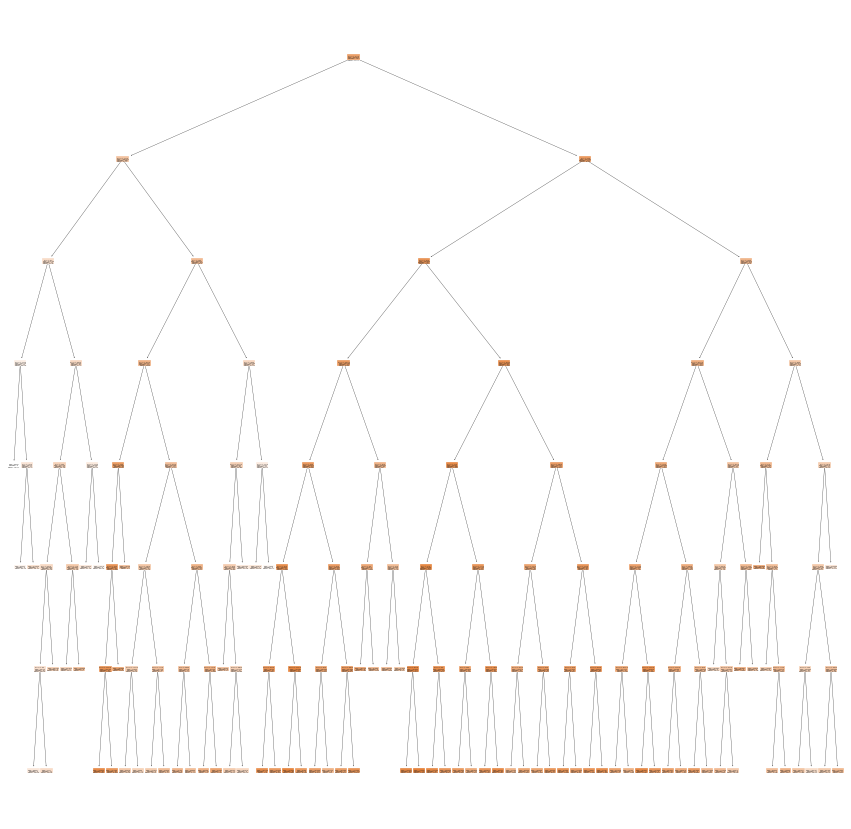

In [119]:
from sklearn.tree import DecisionTreeRegressor

sktree = DecisionTreeRegressor(max_depth=7, min_samples_split=12, min_samples_leaf=5, ccp_alpha=0.001, random_state=2016)
print(sktree.fit(X_train, y_train))

score = sktree.score(X_test, y_test, sample_weight=None)
print("Score =", score)

# Comprobamos la profundidad del árbol obtenido inicialmente sin restricciones:
print(sktree.get_depth())

%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
_ = plot_tree(sktree, filled = True, proportion = False)

Se podrían seguir probando valores de parámetros pero dado que hemos alcanzado un "score"=0.6676, se decide parar.

### ANÁLISIS DE MÉTRICAS

Calculamos el RMSE (Raíz del Error cuadrático medio) tanto en "train" como en "test" y comparamos los resultados. Representamos el RMSE ya que de esa mamnera el error estará en las unidades de la variable objetivo.

In [120]:
from sklearn.metrics import mean_squared_error

pred_train = sktree.predict(X_train)
pred_test = sktree.predict(X_test)

print('Train Error (RMSE):', mean_squared_error(y_train, pred_train, squared=False))
print('Test Error (RMSE):', mean_squared_error(y_test, pred_test, squared=False))

Train Error (RMSE): 12.23142244490984
Test Error (RMSE): 16.726440114557068


Dado que el error en "train" es menor que el error en "test" estamos ante un caso de "overfitting", aunque la diferencia no es muy grande entre ambos errores por lo que se podrían aceptar los parámetros definidos para el modelo.

La diferencia entre el MSE/RMSE (Error cuadrático medio/Raíz Error cuadrático medio) con el MAE es que el primero da más importancia a los errores mayores, por lo que es más sensible a los "outliers" (valores atípicos), mientras que el MAE es más resistente a los mismos. 

El MSE/RMSE se basan en el principio de promediar los errores, mientras que el cálculo del MAE se basa en la mediana del error.

### AJUSTE DE HIPERPARÁMETROS (usando GridSearchCV)

In [121]:
# Aquí vamos a hacerlo MUUUUY sencillo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

gcv = GridSearchCV(DecisionTreeRegressor(random_state=2016), 
             param_grid = {
                 'max_depth': [4, 5, 6, 7, 8, 9],
                 'criterion': ['mse'],
                 'min_samples_split': [0, 1, 2, 3, 4, 5],
                 'min_samples_leaf': [0, 9, 10, 11, 12, 13],
                 'ccp_alpha': [0, 0.01, 0.05, 0.10, 0.15]
             },
             refit = True,
             cv = 5,
             n_jobs=4)

gcv.fit(X_train, y_train)

C:\Anaconda3\envs\env_practica_eval_arboles\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan ... 0.6770465 0.6770465 0.6770465]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2016), n_jobs=4,
             param_grid={'ccp_alpha': [0, 0.01, 0.05, 0.1, 0.15],
                         'criterion': ['mse'], 'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [0, 9, 10, 11, 12, 13],
                         'min_samples_split': [0, 1, 2, 3, 4, 5]})

In [122]:
score = gcv.score(X_test, y_test)
print("Score =", score)

Score = 0.6319331835953655


In [123]:
gcv.best_params_

{'ccp_alpha': 0,
 'criterion': 'mse',
 'max_depth': 6,
 'min_samples_leaf': 11,
 'min_samples_split': 2}

In [124]:
gcv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0, max_depth=6, min_samples_leaf=11,
                      random_state=2016)

In [125]:
from sklearn.metrics import mean_squared_error

pred_train = gcv.predict(X_train)
pred_test = gcv.predict(X_test)

print('Train Error (MSE):', mean_squared_error(y_train, pred_train, squared=False))
print('Test Error (MSE):', mean_squared_error(y_test, pred_test, squared=False))

Train Error (MSE): 13.896435908829991
Test Error (MSE): 17.601618794505892


<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE NOTEBOOK<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>